# Insurance Claim Fraud Detection

Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv




In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [189]:
!pip install imbalanced-learn

In [190]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [192]:
df.shape

(1000, 40)

# Exploratory Data Analysis



In [193]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [194]:
#checking for duplicate values

df.drop_duplicates(inplace=True)
df.shape

(1000, 40)

<AxesSubplot:>

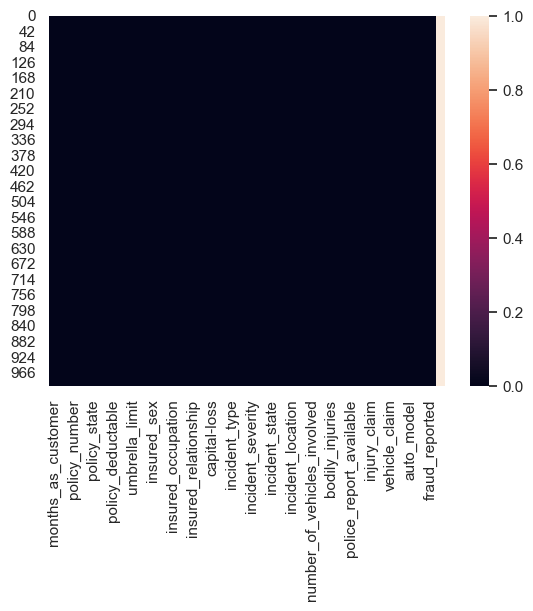

In [195]:
#lets visualize it using heatmap

sns.heatmap(df.isnull())

In [196]:
df1=df.copy()
                       
df1                   

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [197]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)



categorical Columns: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Numerical Columns: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']


In [198]:
#Drop extra or irrelevant columns:

#Since column Capital gain and Capital loss has '0' integer values, we will drop them from the table.

df1.drop(columns=['_c39'],axis=1,inplace=True)


In [199]:
# We need to fix the value of the row that has a value ?

col_missing_data = []

for i in df1.columns:
    if '?' in df1[i].values:
        col_missing_data.append(i)

col_missing_data


['collision_type', 'property_damage', 'police_report_available']

In [200]:
df1[col_missing_data].value_counts()


collision_type   property_damage  police_report_available
Rear Collision   ?                YES                        43
Side Collision   ?                ?                          40
Rear Collision   NO               NO                         39
                 YES              ?                          39
Side Collision   ?                YES                        35
Front Collision  ?                ?                          35
Rear Collision   NO               ?                          35
?                NO               NO                         32
Side Collision   NO               ?                          32
Front Collision  ?                YES                        32
Side Collision   NO               YES                        31
Front Collision  NO               NO                         31
                 YES              NO                         30
Rear Collision   YES              NO                         30
Side Collision   YES              YES         

In [201]:
#Now let's change the '?'value into a proper label, we can use not_documented

df1["collision_type"] = np.where(df1["collision_type"] == "?", "not_documented", df1["collision_type"])
df1["property_damage"] = np.where(df1["property_damage"] == "?", "not_documented", df1["property_damage"])
df1["police_report_available"] = np.where(df1["police_report_available"] == "?", "not_documented", df1["police_report_available"])
     

In [202]:
#lets change also the date column into years so its easier 

df1["policy_bind_date"] = pd.to_datetime(df1["policy_bind_date"])
df1["policy_bind_year"] = df1["policy_bind_date"].dt.year

df1["policy_bind_year"]

0      2014
1      2006
2      2000
3      1990
4      2014
       ... 
995    1991
996    2014
997    2003
998    2011
999    1996
Name: policy_bind_year, Length: 1000, dtype: int64

In [203]:
#Lets remove irrelevant column policy number because it carries all the unique values

df1.drop(columns=['policy_number'],axis=1,inplace=True)


In [204]:
#checking the value counts of each column

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    3

In [205]:
df1

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-06-09           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

    insured_sex  ... police_report_available total_claim_amount injury_claim  \
0          MALE  ...                     YES              71610         6510   
1          MALE  ...          not_documented               5070          780   
2        FEMALE  ...                      NO              34650         7700   
3        FEMALE  ...                      NO              63400         6340   
4          MALE  ...                      NO               6500         1300   
..          ...  ...                     ...                ...          ...   
995      FEMALE  ...          not_documented              87200        17440   
996      FEMALE  ...          not_documented             108480        18080   
997      FEMALE  ...                     YES              67500         7500   
998        MALE  ...                     YES              46980         5220   
999      FEMALE  ...          not_documented               5060          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported policy_bind_year  
0                Y             2014  
1                Y             2006  
2                N             2000  
3                Y             1990  
4                N             2014  
..             ...              ...  
995              N             1991  
996              N             2014  
997              N             2003  
998      

## Data Analysis

After data clean up we can now explore data to discover the pattern and relationship through graphing

## Univariate 

Each feature will be graphed individually from the data

Text(0.5, 0, ' ')

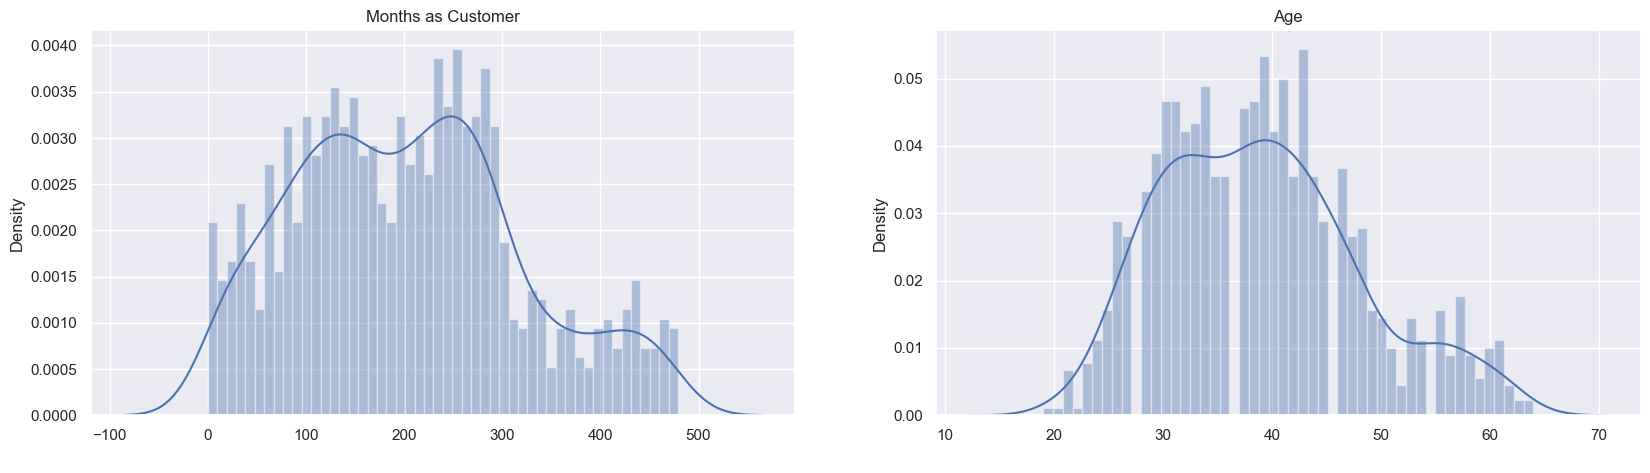

In [436]:
#visualize the number of age column and months_as_customer

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_graph

sns.distplot(df1["months_as_customer"], bins=50 , ax=ax1)
ax1.set_title("Months as Customer")
ax1.set_xlabel(" ")

sns.distplot(df1["age"], bins=50 , ax=ax2)
ax2.set_title("Age")
ax2.set_xlabel(" ")

In [207]:
df1[["months_as_customer","age"]].describe()

months_as_customer          age
count         1000.000000  1000.000000
mean           203.954000    38.948000
std            115.113174     9.140287
min              0.000000    19.000000
25%            115.750000    32.000000
50%            199.500000    38.000000
75%            276.250000    44.000000
max            479.000000    64.000000

1. "months_as_customer" shows normal distributionn with most customers 0-276 months. 

2. "age" shows normal distribution being 38 years old. 

In [208]:
df1["policy_bind_date"].nunique()

951

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

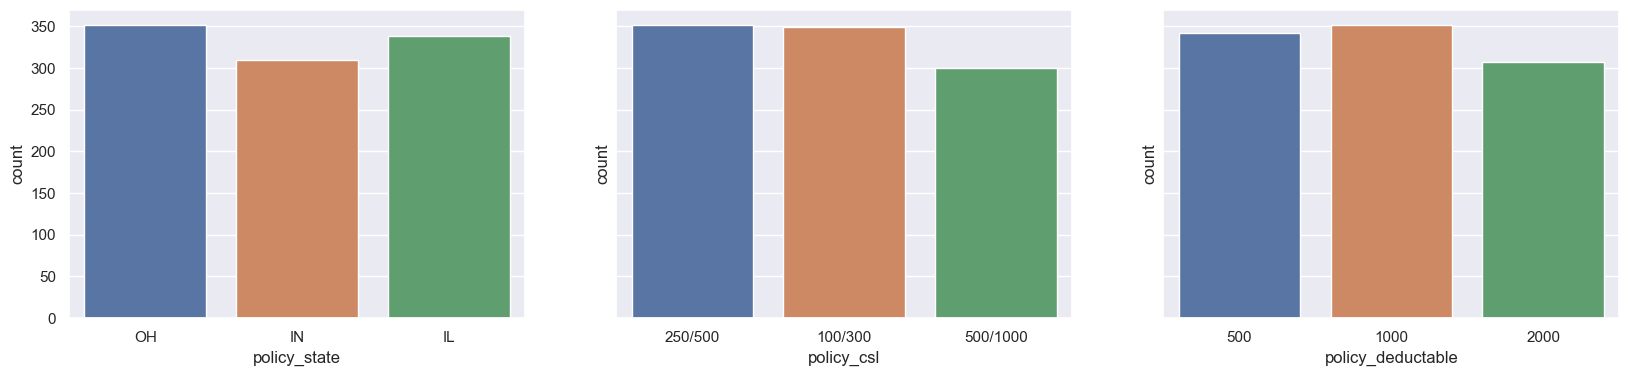

In [209]:
#Lets visualize the countplot of categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1,3,figsize=(20,4),sharey=True)

sns.countplot("policy_state",data=df1, ax =axes[0])
sns.countplot("policy_csl",data=df1,ax=axes[1])
sns.countplot("policy_deductable",data=df1,ax=axes[2])

All the graph shows 3 categories almost similar count for each category

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


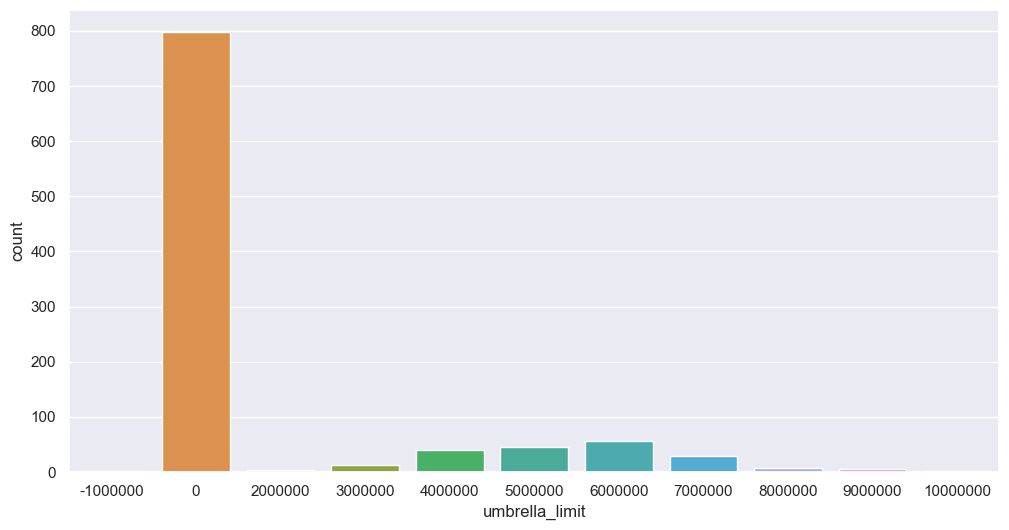

In [210]:
#visualize the column of "umbrella_limit"

plt.figure(figsize=(12,6))

ax=sns.countplot(x= 'umbrella_limit',data=df1)

print(df1['umbrella_limit'].value_counts())


477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64


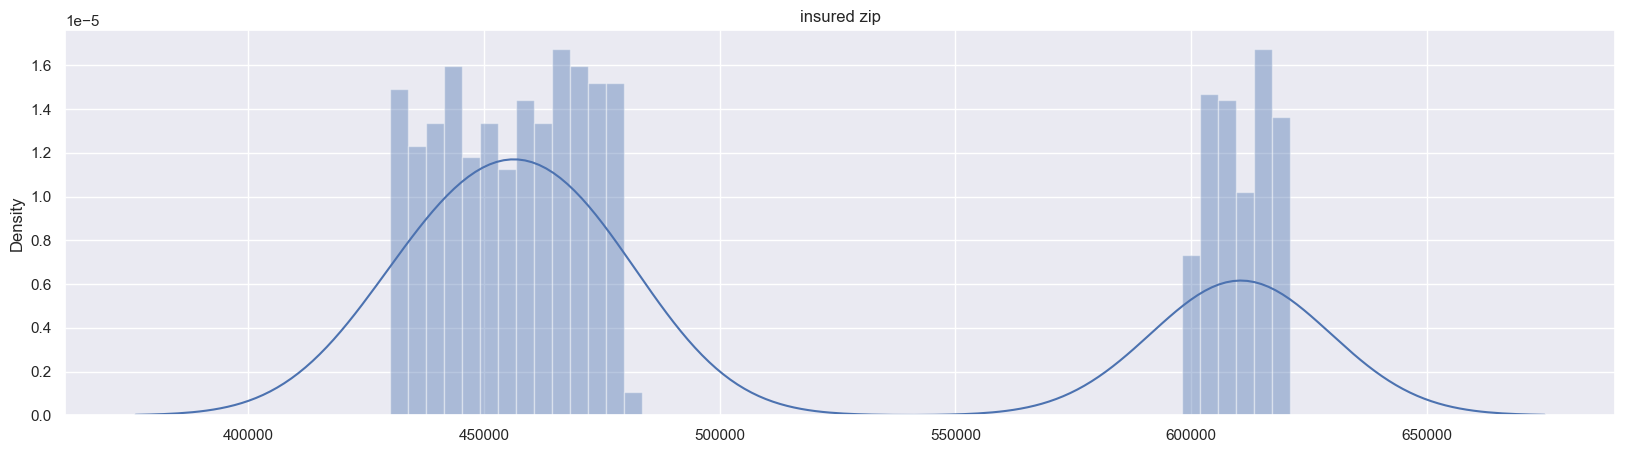

<Figure size 1200x600 with 0 Axes>

In [211]:
#visualize the number of insured_zip column

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["insured_zip"],bins=50,ax=ax1)
ax1.set_title("insured zip")
ax1.set_xlabel(" ")

print(df1['insured_zip'].value_counts())



There are many unique values in the features so we will remove this column

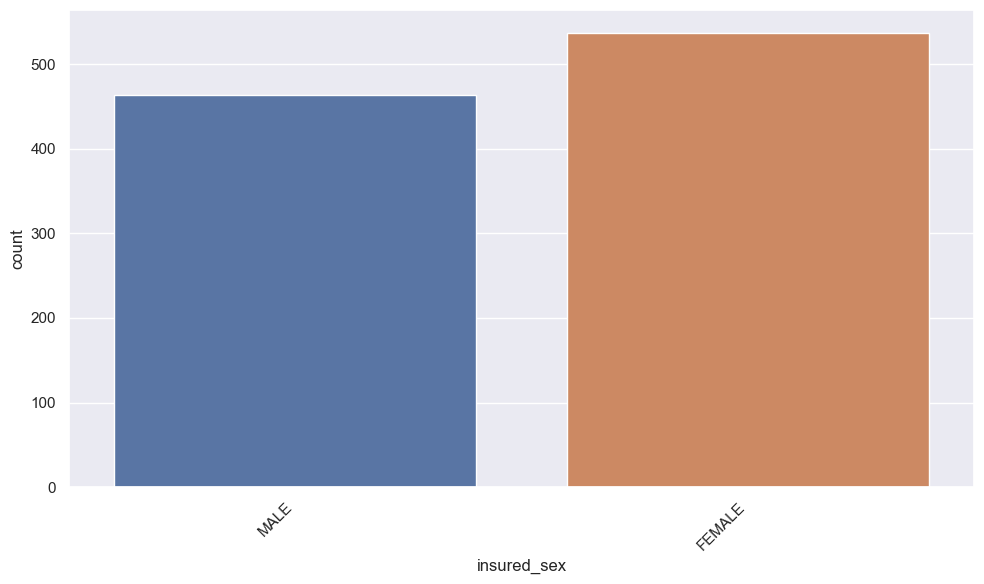

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [212]:
#visualize the number of insured_sex column

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'insured_sex',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['insured_sex'].value_counts())


This feature shows the presence that Female are more than Male 

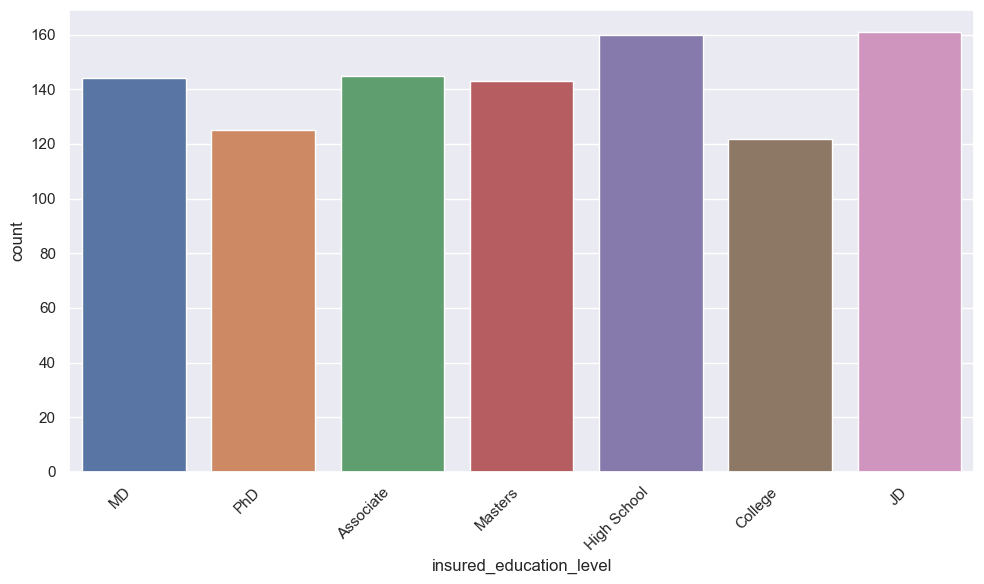

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [213]:
#visualize the counterplot of "insured_education_level" column

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'insured_education_level',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['insured_education_level'].value_counts())


The feature has seven education level 

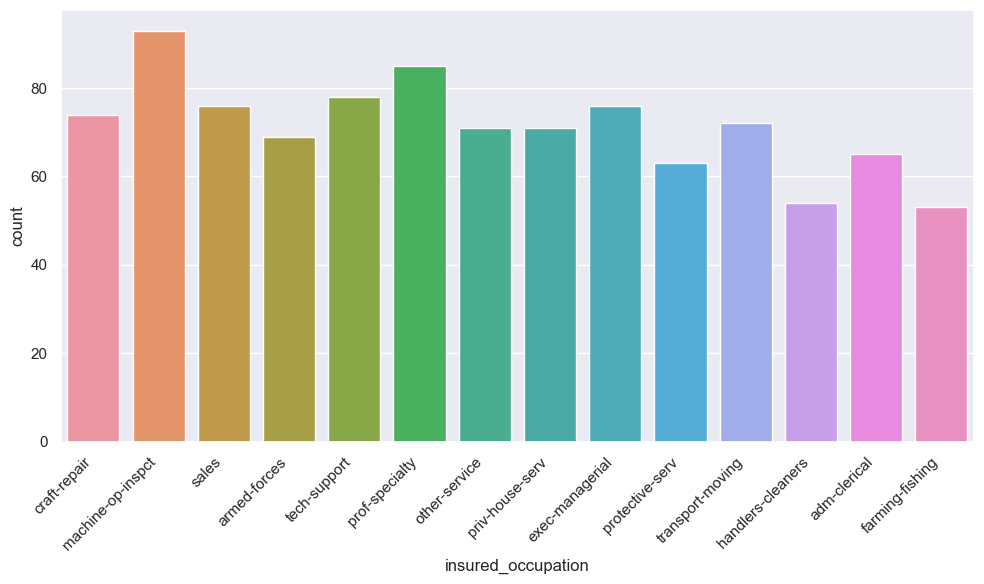

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [214]:
#Lets do countplot for the "insured_occupation" feature

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'insured_occupation',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['insured_occupation'].value_counts())


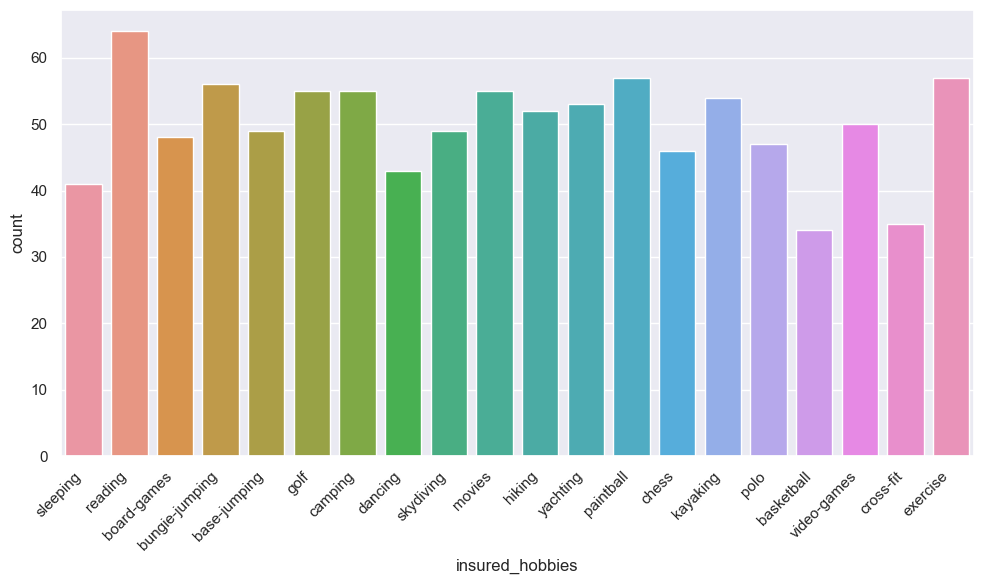

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [215]:
#Lets do countplot for the "insured_hobbies" feature

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'insured_hobbies',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['insured_hobbies'].value_counts())



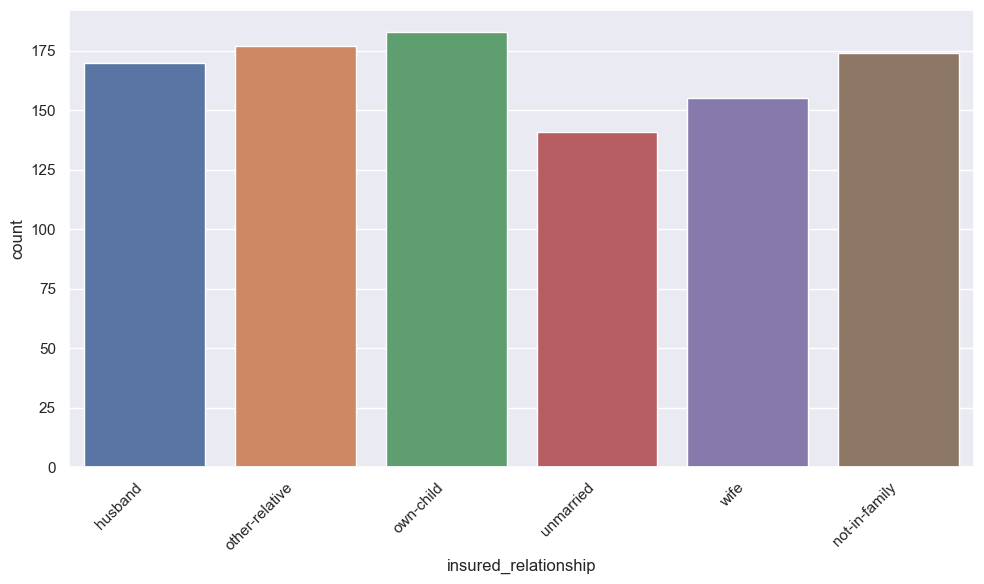

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [216]:
#Lets do countplot for the "insured_relationship" feature

plt.figure(figsize=(10,6))
ax=sns.countplot(x= 'insured_relationship',data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") 
plt.tight_layout()  # To ensure labels are fully visible
plt.show()
print(df1['insured_relationship'].value_counts())


0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64


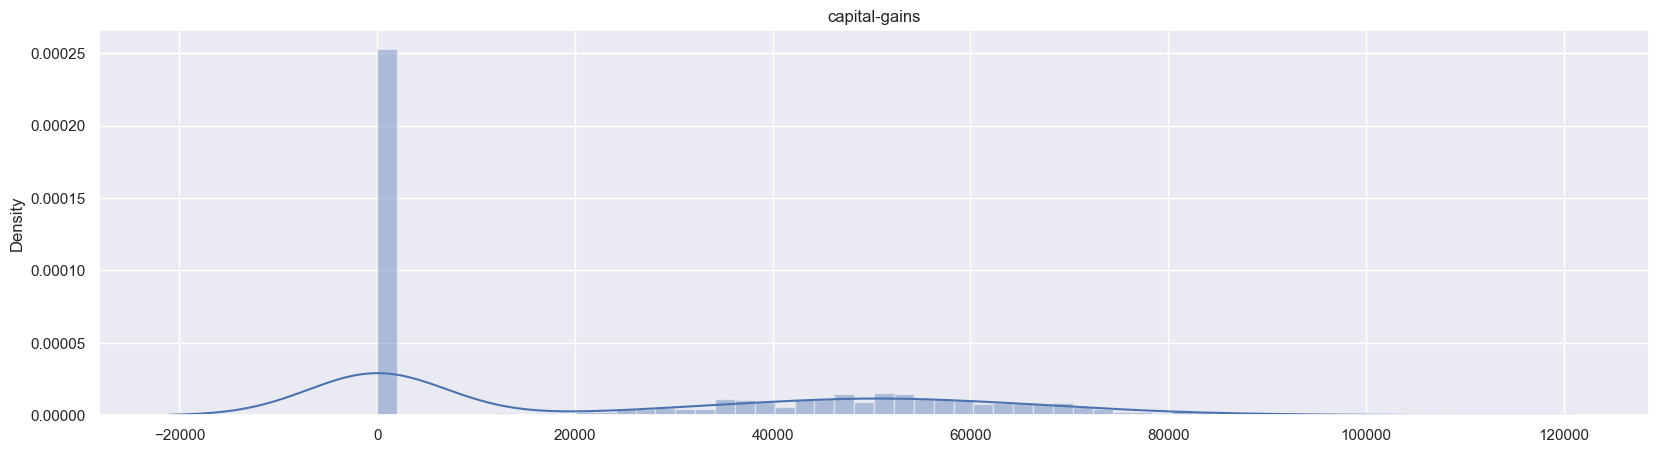

<Figure size 1200x600 with 0 Axes>

In [217]:
#Lets do distplot for the "capital gains" feature


sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["capital-gains"],bins=50,ax=ax1)
ax1.set_title("capital-gains")
ax1.set_xlabel(" ")

print(df1['capital-gains'].value_counts())



 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64


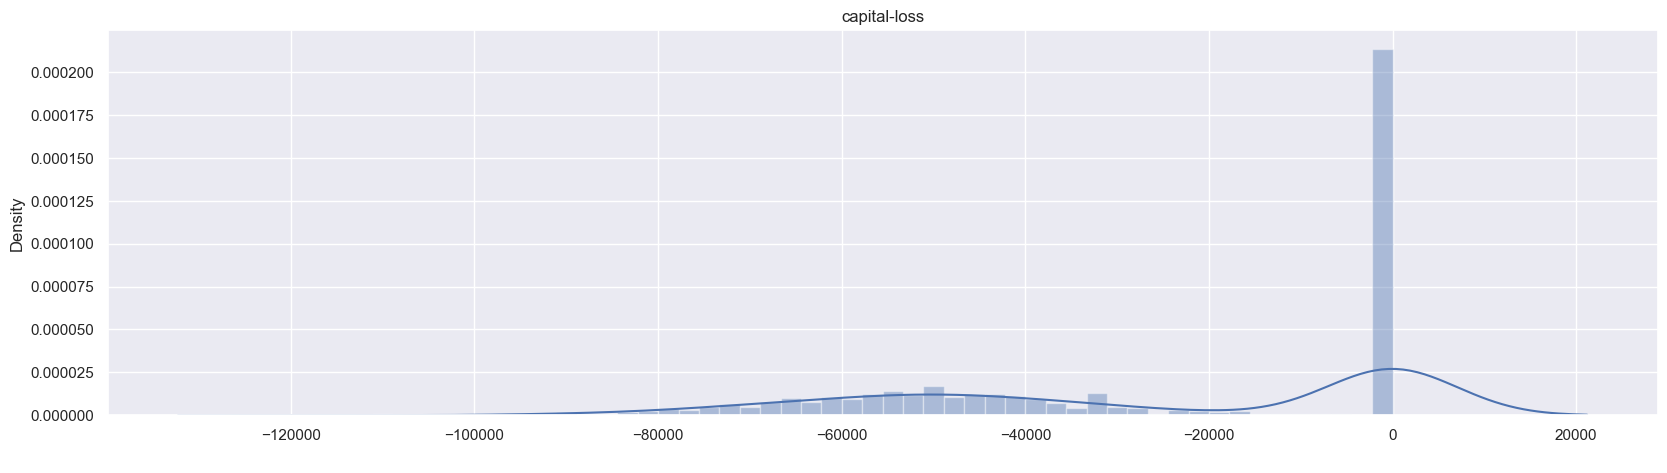

<Figure size 1200x600 with 0 Axes>

In [218]:
#Lets do distplot for the "capital loss" feature


sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["capital-loss"],bins=50,ax=ax1)
ax1.set_title("capital-loss")
ax1.set_xlabel(" ")

print(df1['capital-loss'].value_counts())


In [219]:
#Extracting the month from "incident_date":

df1["incident_date"] = pd.to_datetime(df1["incident_date"])
df1['incident_month']= df1['incident_date'].dt.month

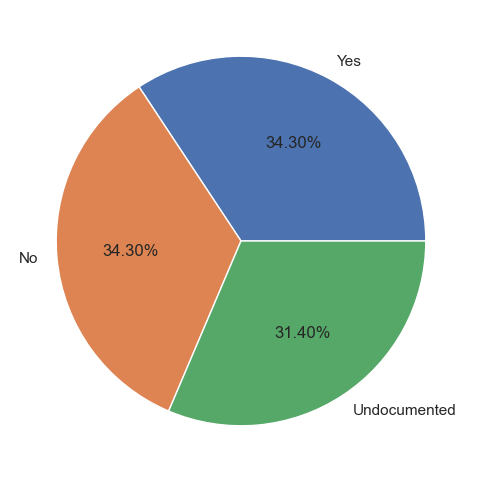

In [220]:
#visualize the count of the type of income 


labels='Yes','No','Undocumented'
fig, ax =plt.subplots(figsize=(10,6))
ax.pie(df1["police_report_available"].value_counts(),labels=labels,autopct='%1.2f%%')
plt.show()


We have Yes and no equal amount and undocumented cases are 31.40%

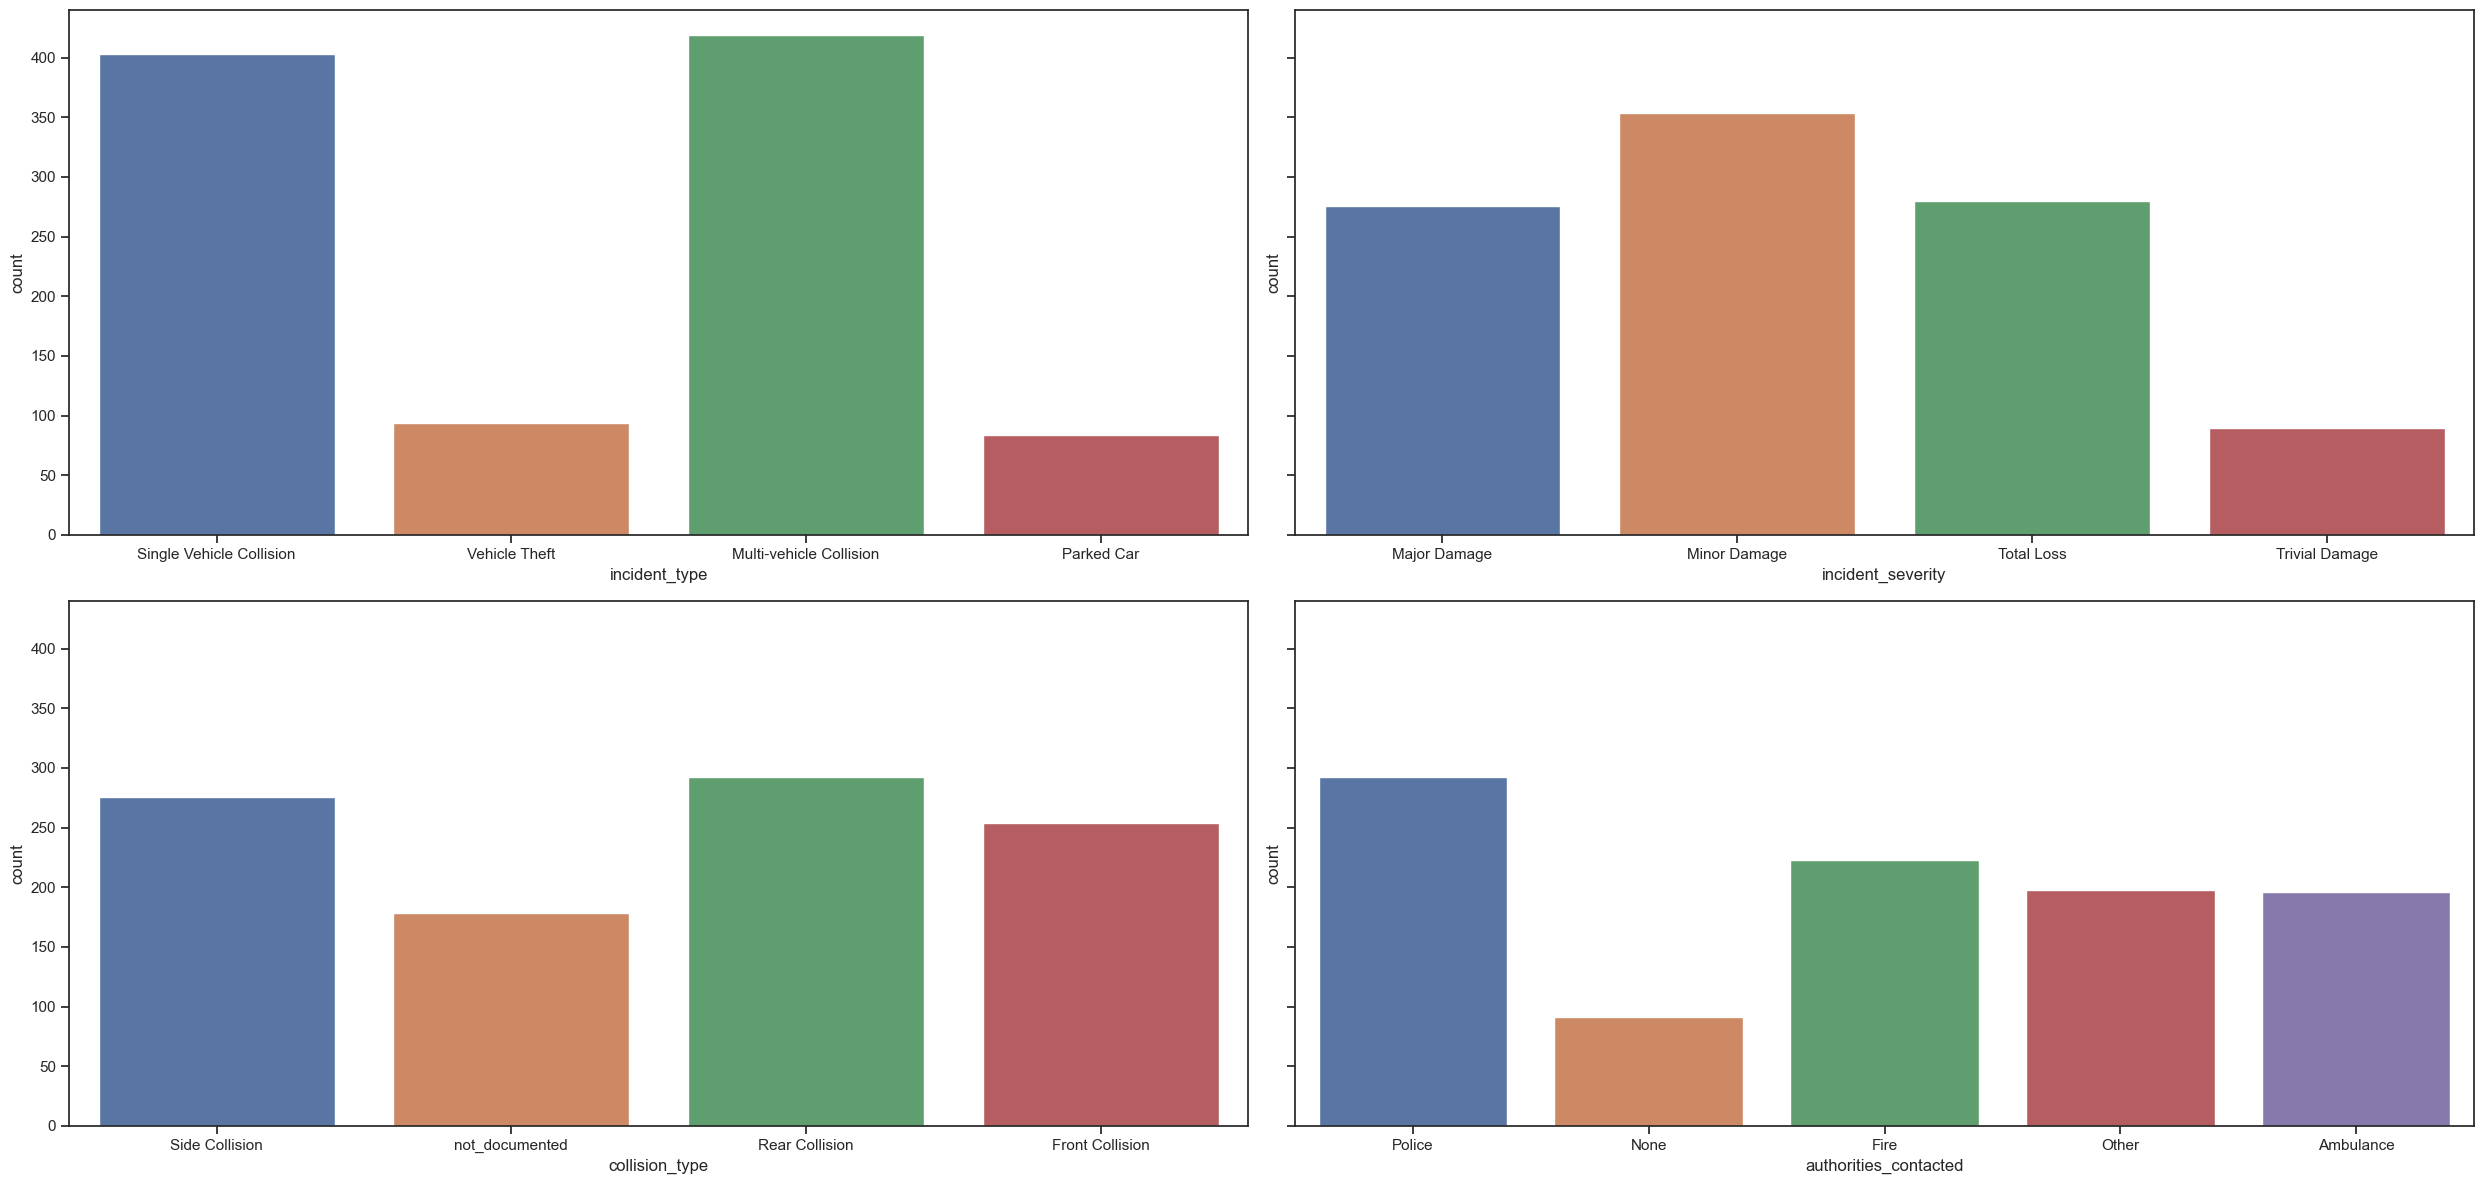

In [221]:
#visualize all the number of incident columns:

sns.set(style="ticks")

fig, axes = plt.subplots(2,2,figsize=(25,12),sharey=True)
                         
sns.countplot("incident_type", data=df1, ax=axes[0,0])
sns.countplot("incident_severity", data=df1, ax=axes[0,1])
sns.countplot("collision_type", data=df1, ax=axes[1,0])
sns.countplot("authorities_contacted", data=df1, ax=axes[1,1])

plt.tight_layout()
                         
plt.show()

The first graph incident type shows equal amount of single vehicle and multi vehicle collision, collision_type has 4 categories and 1 has cases with no documents, the fourth column indicates authorities that were contacted after the incident. 

Text(0.5, 0, ' ')

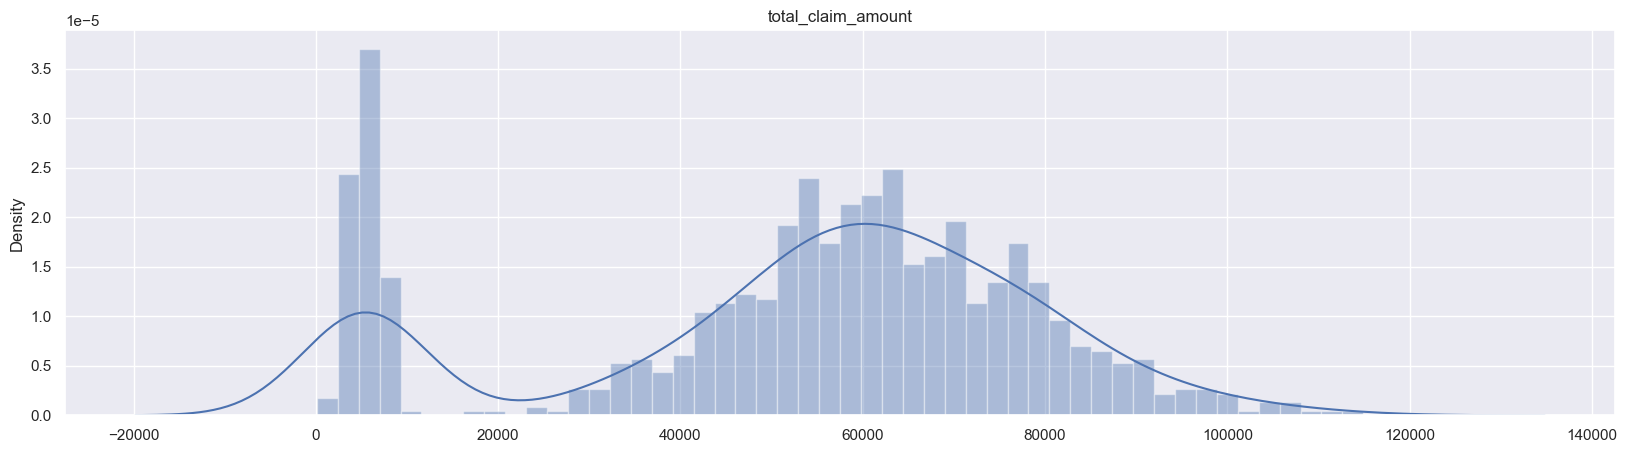

<Figure size 1200x600 with 0 Axes>

In [222]:
#Lets check features with total_claim_amount

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["total_claim_amount"],bins=50,ax=ax1)
ax1.set_title("total_claim_amount")
ax1.set_xlabel(" ")

Text(0.5, 0, ' ')

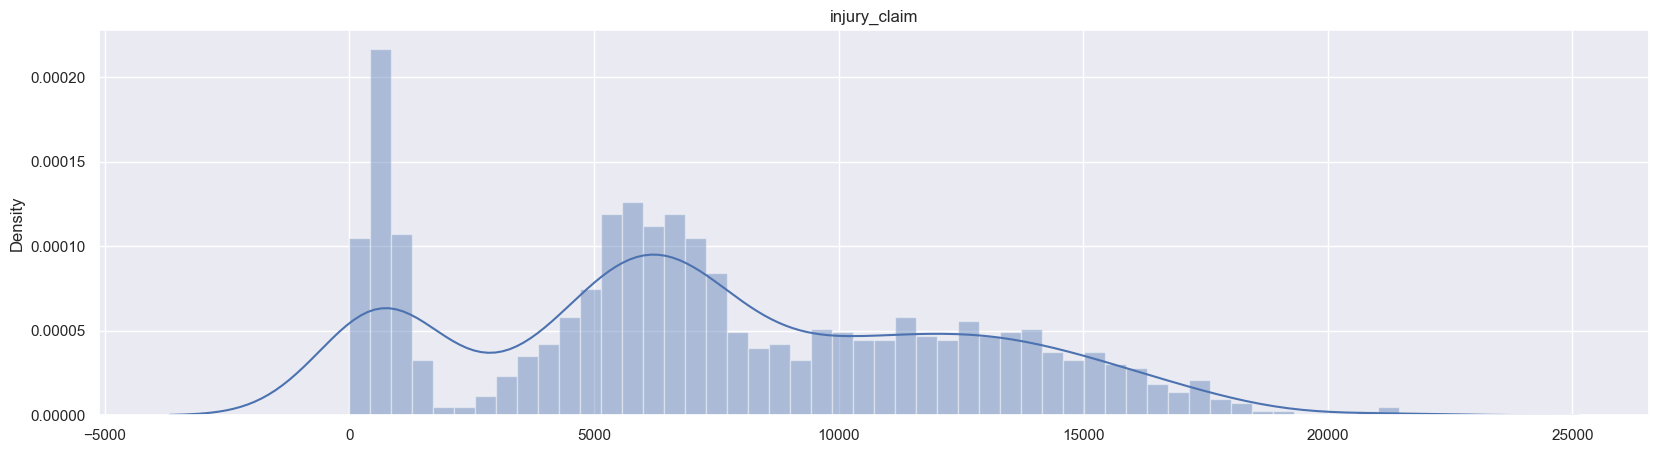

<Figure size 1200x600 with 0 Axes>

In [223]:
#Lets check feature with injury claim amount

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["injury_claim"],bins=50,ax=ax1)
ax1.set_title("injury_claim")
ax1.set_xlabel(" ")


Text(0.5, 0, ' ')

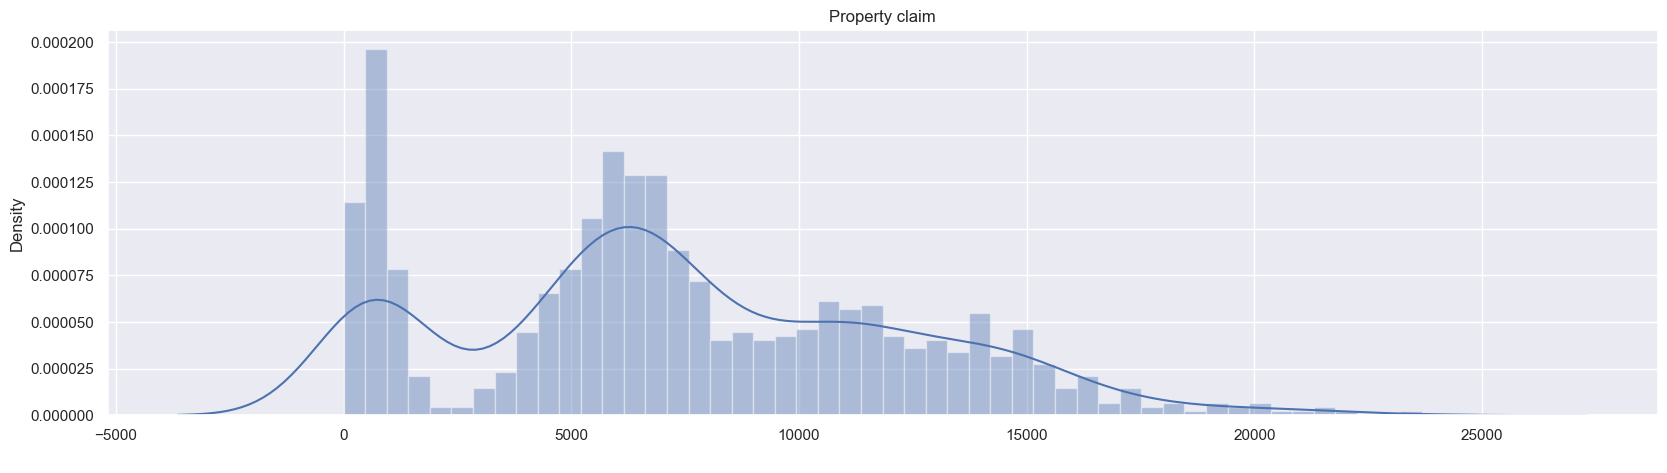

<Figure size 1200x600 with 0 Axes>

In [224]:
#Lets check feature with property claim 

sns.set(style="darkgrid")
plot_graph = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
fig,ax1=plot_graph

plt.figure(figsize=(12,6))
sns.distplot(df1["property_claim"],bins=50,ax=ax1)
ax1.set_title("Property claim")
ax1.set_xlabel(" ")

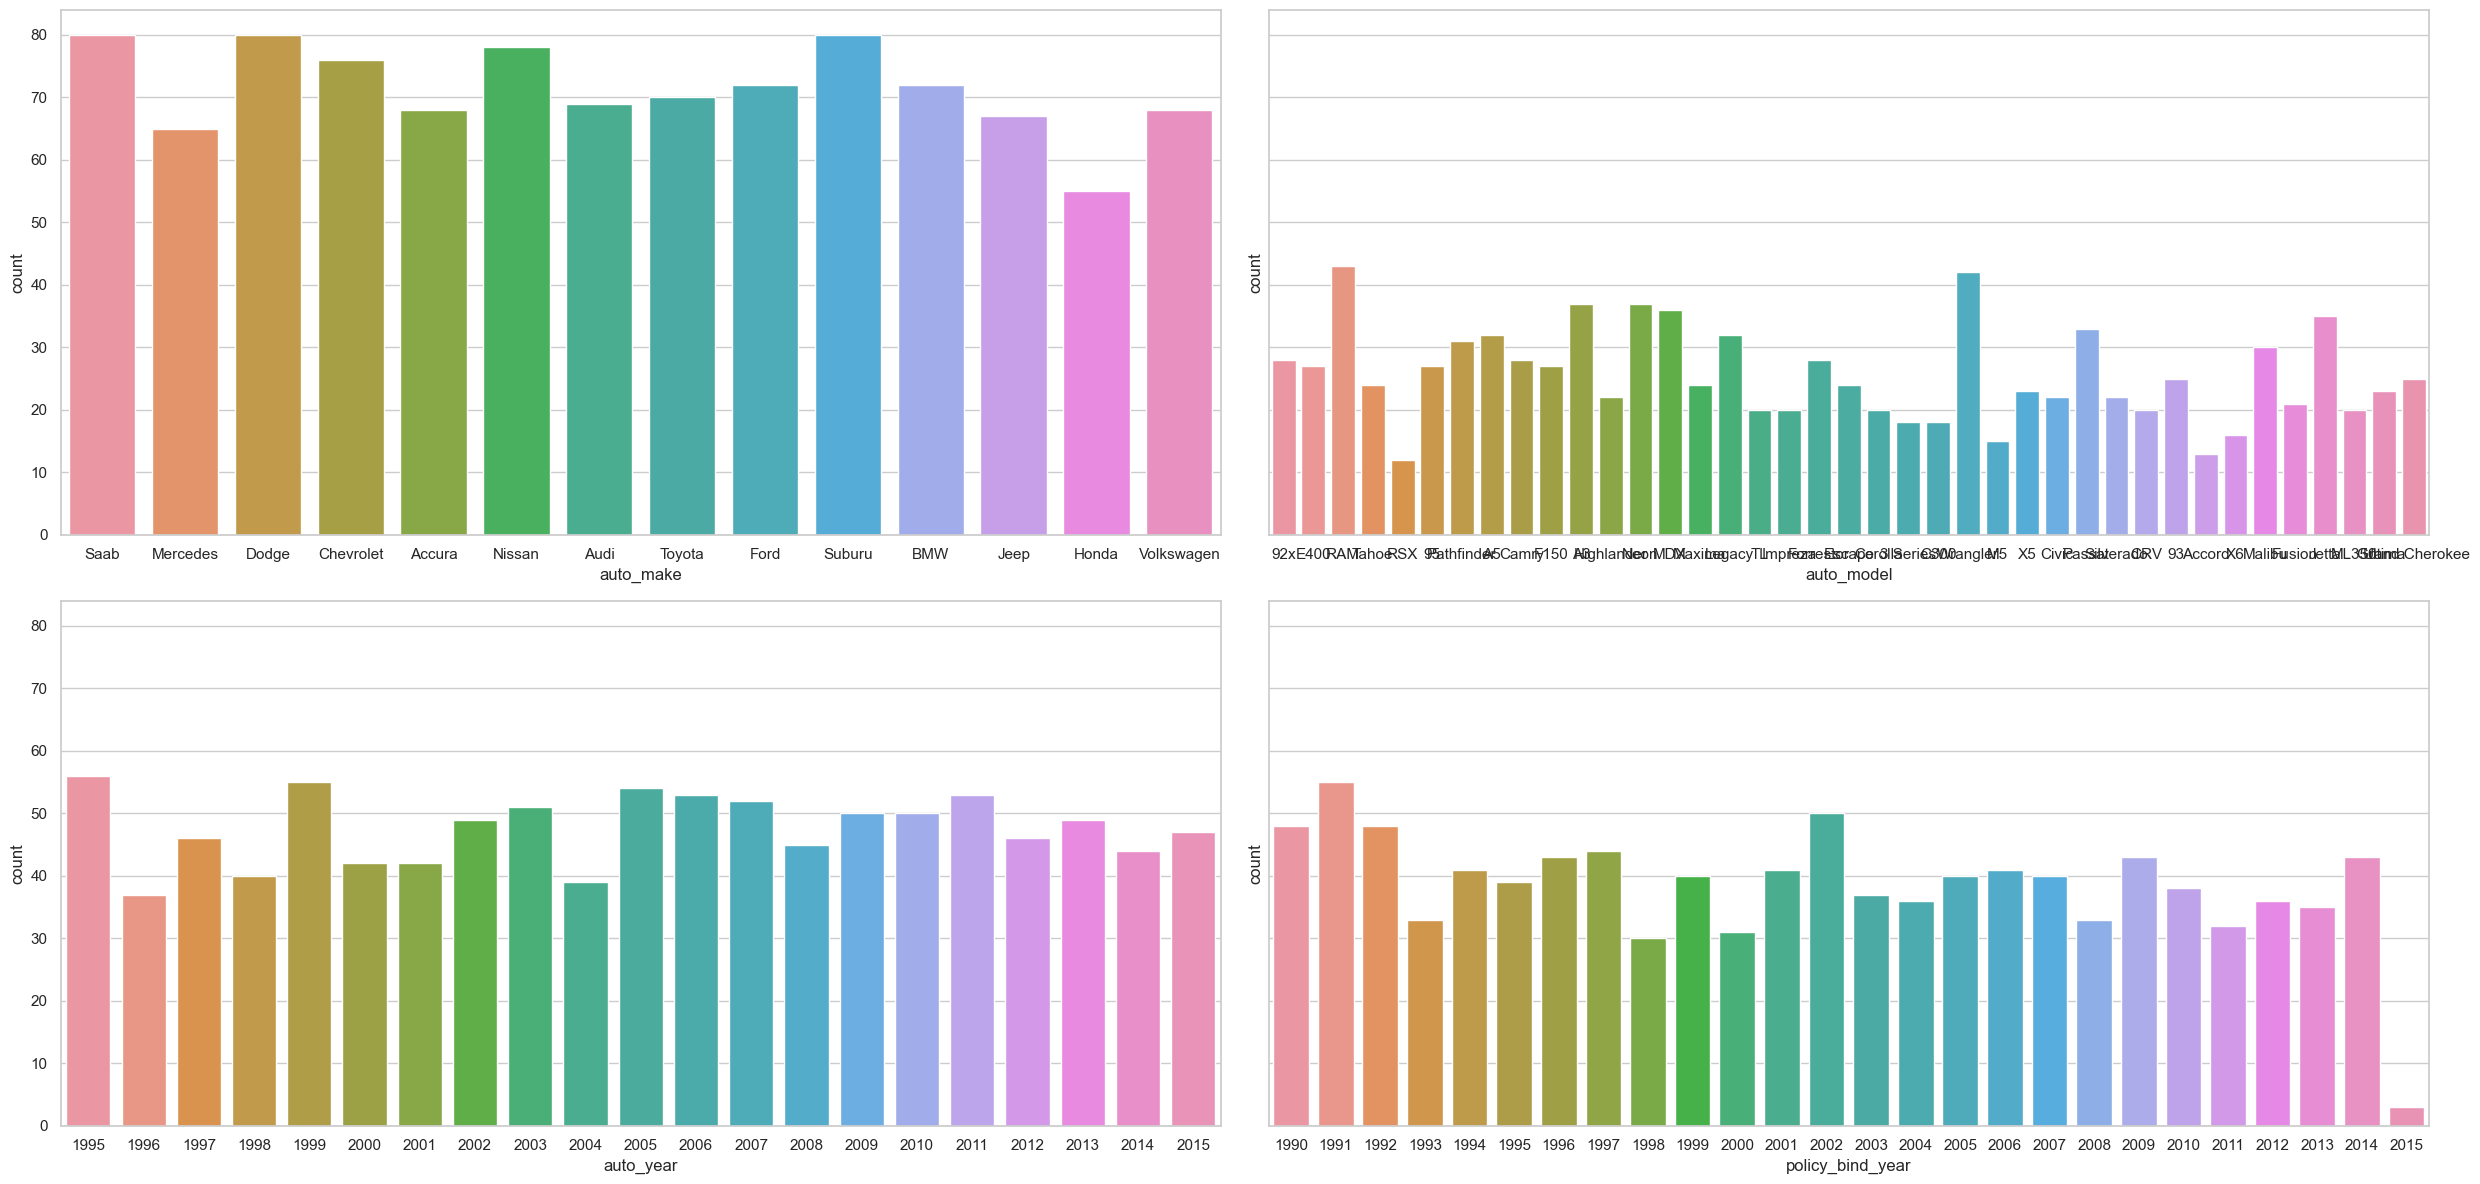

In [225]:
#Now we will plot the automobile columns to see the numbers of count each column

sns.set(style="whitegrid")

fig, axes = plt.subplots(2,2,figsize=(25,12),sharey=True)
                         
sns.countplot("auto_make", data=df1, ax=axes[0,0])
sns.countplot("auto_model", data=df1, ax=axes[0,1])
sns.countplot("auto_year", data=df1, ax=axes[1,0])
sns.countplot("policy_bind_year", data=df1, ax=axes[1,1])

plt.tight_layout()
                         
plt.show()

The first graph show Saab and Saburu has equal number of auto make, auto year 1995 is the highest in claim, policy bind year is 1991 and 2002 is the highest number.  

<AxesSubplot:xlabel='incident_month', ylabel='count'>

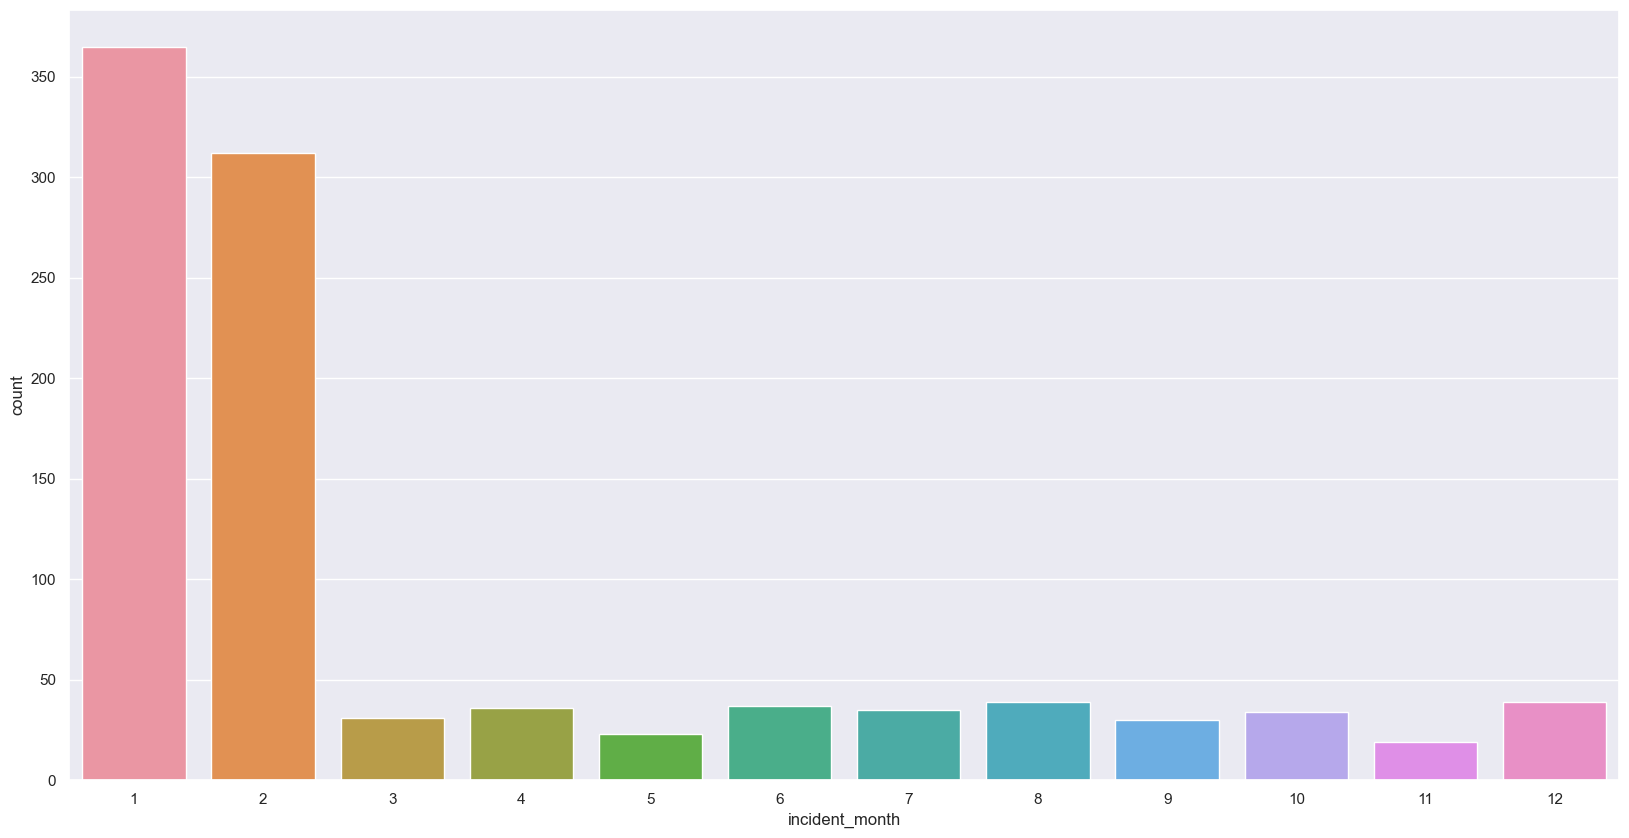

In [226]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1,1,figsize=(20,10),sharey=True)
sns.countplot("incident_month", data=df1, ax=axes)
          

The first two months are the highest to show the most accidents 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

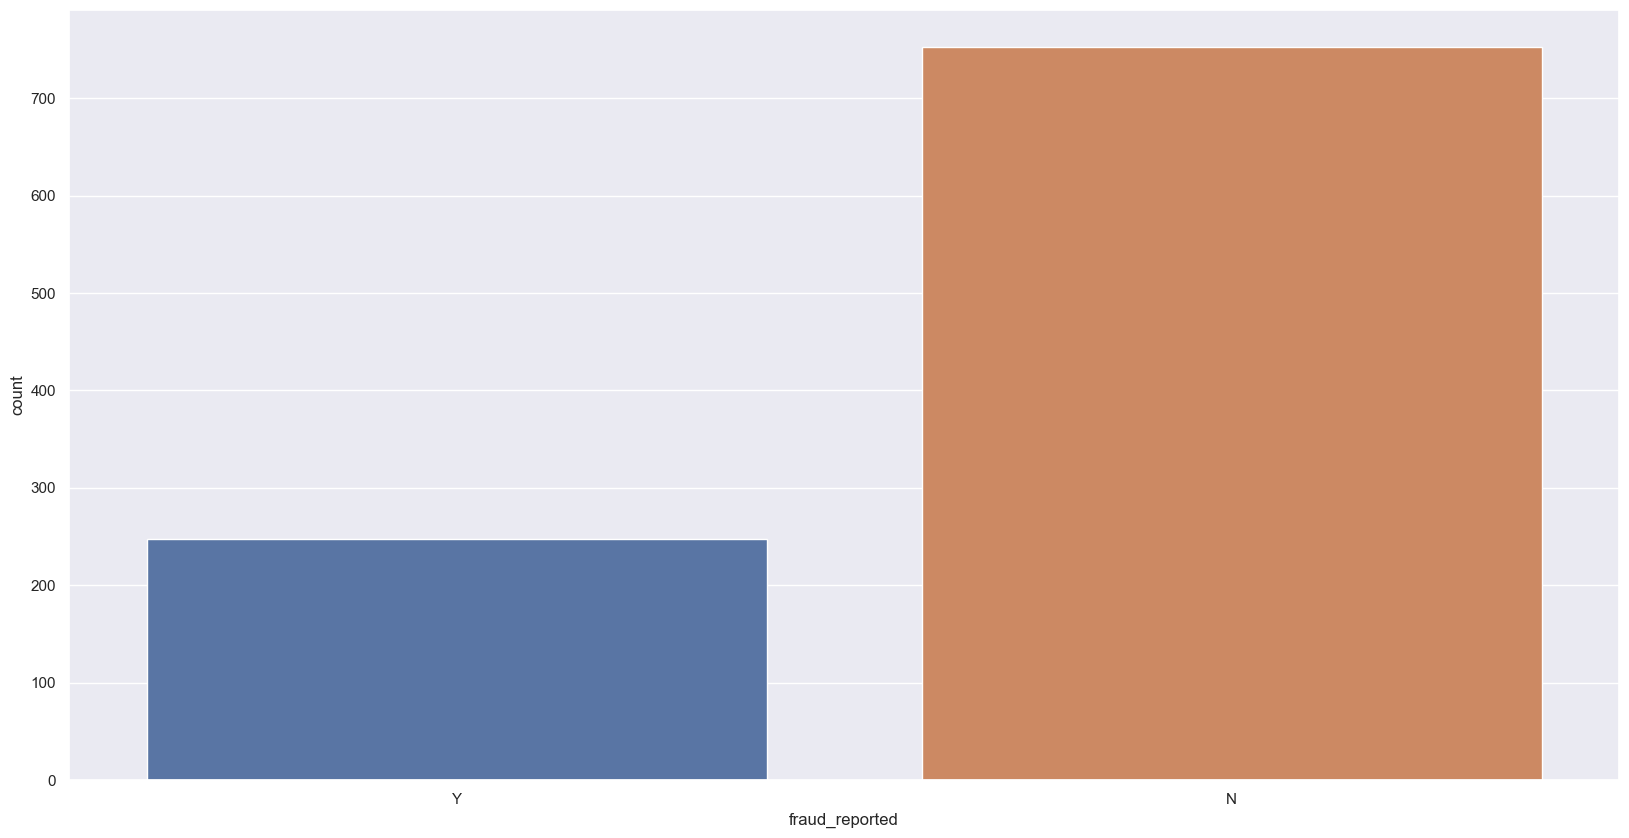

In [227]:
#Now we will check the target variable fraud_reported

sns.set(style="darkgrid")

fig, axes = plt.subplots(1,1,figsize=(20,10),sharey=True)
sns.countplot("fraud_reported", data=df1, ax=axes)
          

## Bivariate Graph 

Analyzing multiple features together to see the relation

<AxesSubplot:title={'center':'Comparision between Fraud_reported and Months of customer'}, xlabel='fraud_reported', ylabel='months_as_customer'>

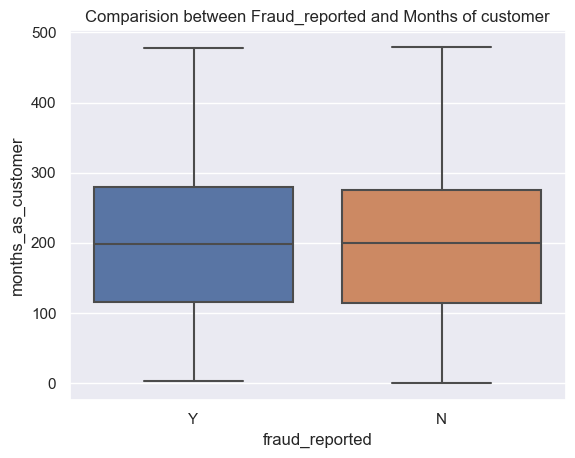

In [228]:
#when we are comparing two data plot:

plt.title("Comparision between Fraud_reported and Months of customer")
sns.boxplot(x="fraud_reported", y = "months_as_customer",data = df1)


<AxesSubplot:title={'center':'Comparision between Fraud_reported and age'}, xlabel='fraud_reported', ylabel='age'>

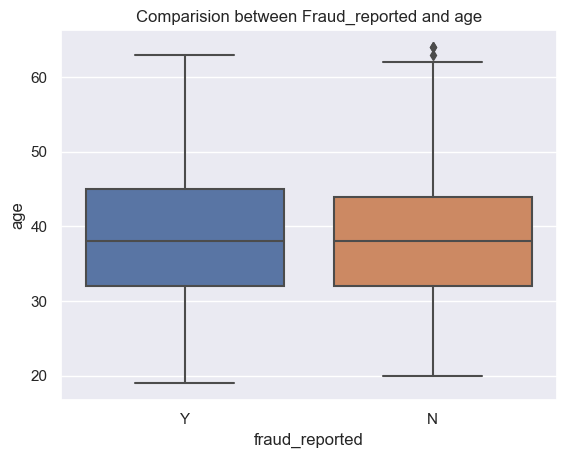

In [229]:
#when we are comparing two data plot:

plt.title("Comparision between Fraud_reported and age")
sns.boxplot(x="fraud_reported", y = "age",data = df1)


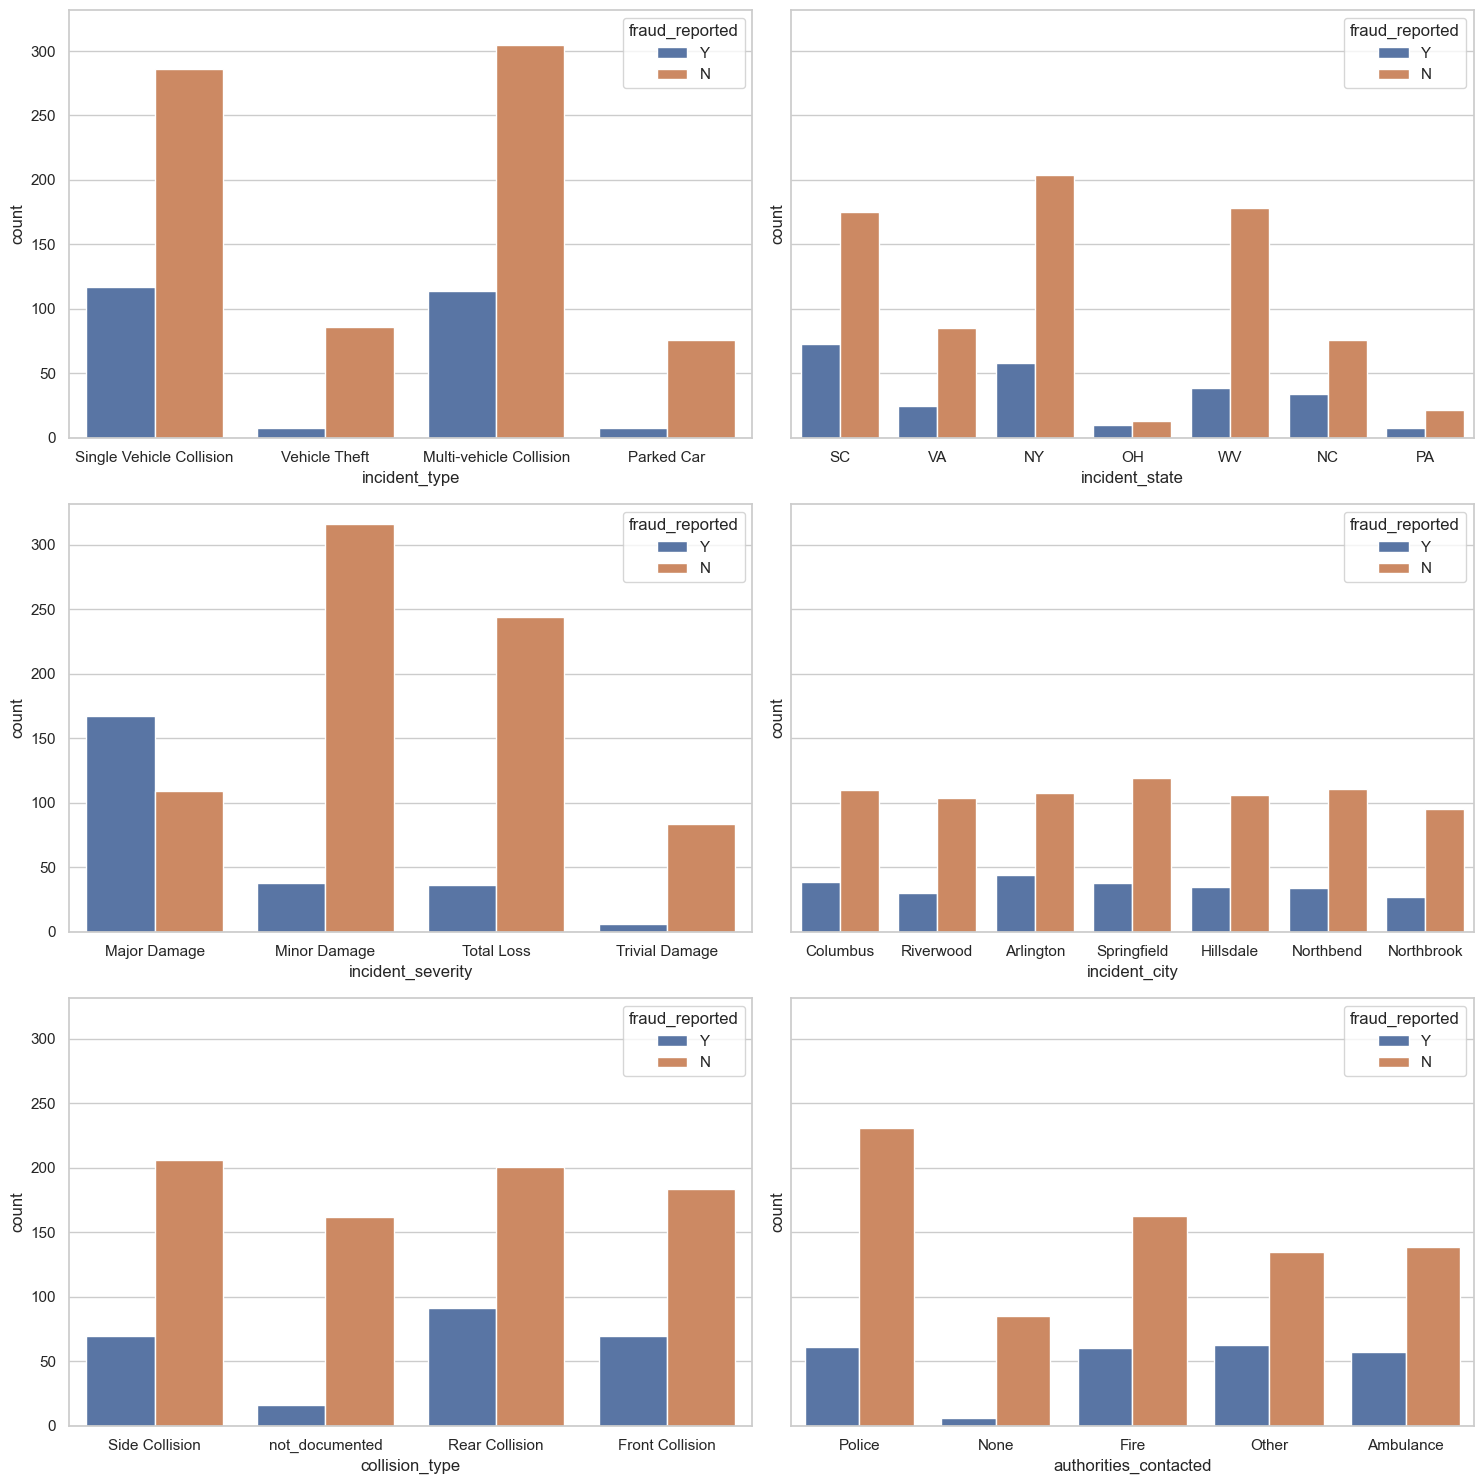

In [230]:
#Plotting the features against dependent features

sns.set(style="whitegrid")

fig, axes = plt.subplots(3,2,figsize=(15,15),sharey=True)
                         
sns.countplot("incident_type", data=df1, hue="fraud_reported", ax=axes[0,0])
sns.countplot("incident_state", data=df1, hue="fraud_reported", ax=axes[0,1])
sns.countplot("incident_severity", data=df1, hue="fraud_reported", ax=axes[1,0])
sns.countplot("incident_city", data=df1, hue="fraud_reported", ax=axes[1,1])
sns.countplot("collision_type", data=df1, hue="fraud_reported", ax=axes[2,0])
sns.countplot("authorities_contacted", data=df1, hue="fraud_reported", ax=axes[2,1])


plt.tight_layout()
                         
plt.show()

The graph shows fraud was reported on single and multi-vehicle transportation, it was also reported on major damage with rear collision and when it was on Fire. 


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

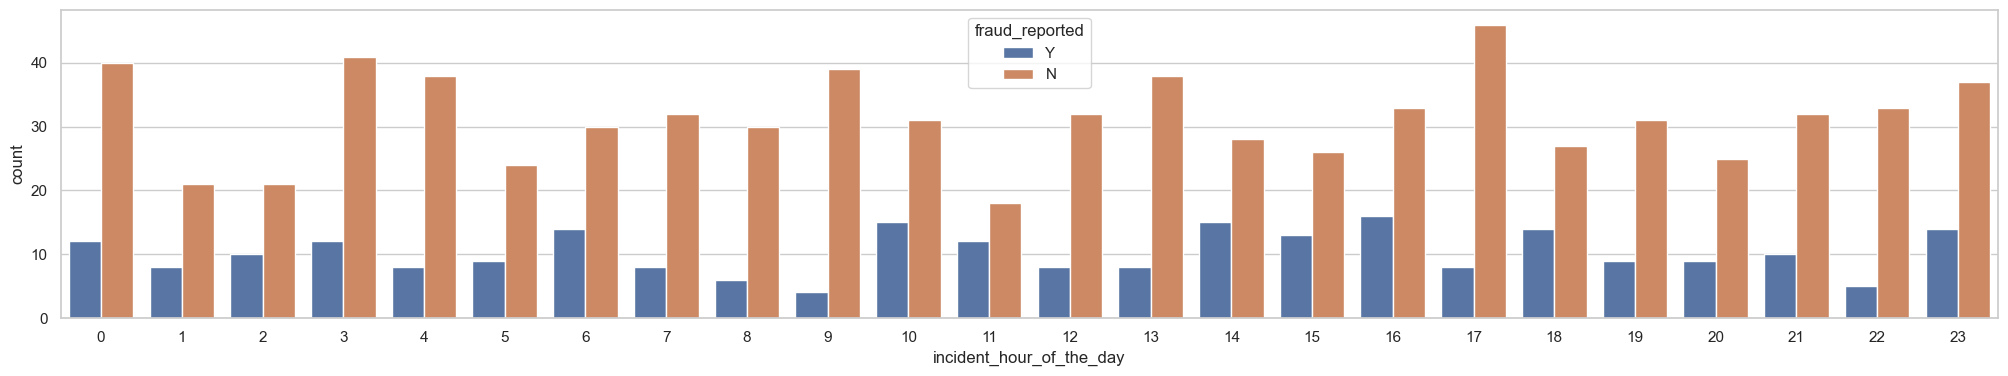

In [231]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,1,figsize=(25,4),sharey=True)

sns.countplot("incident_hour_of_the_day", data=df1, hue="fraud_reported", ax=axes)


The incident was reported 10,14,16 and 23 hours

<AxesSubplot:xlabel='auto_year', ylabel='count'>

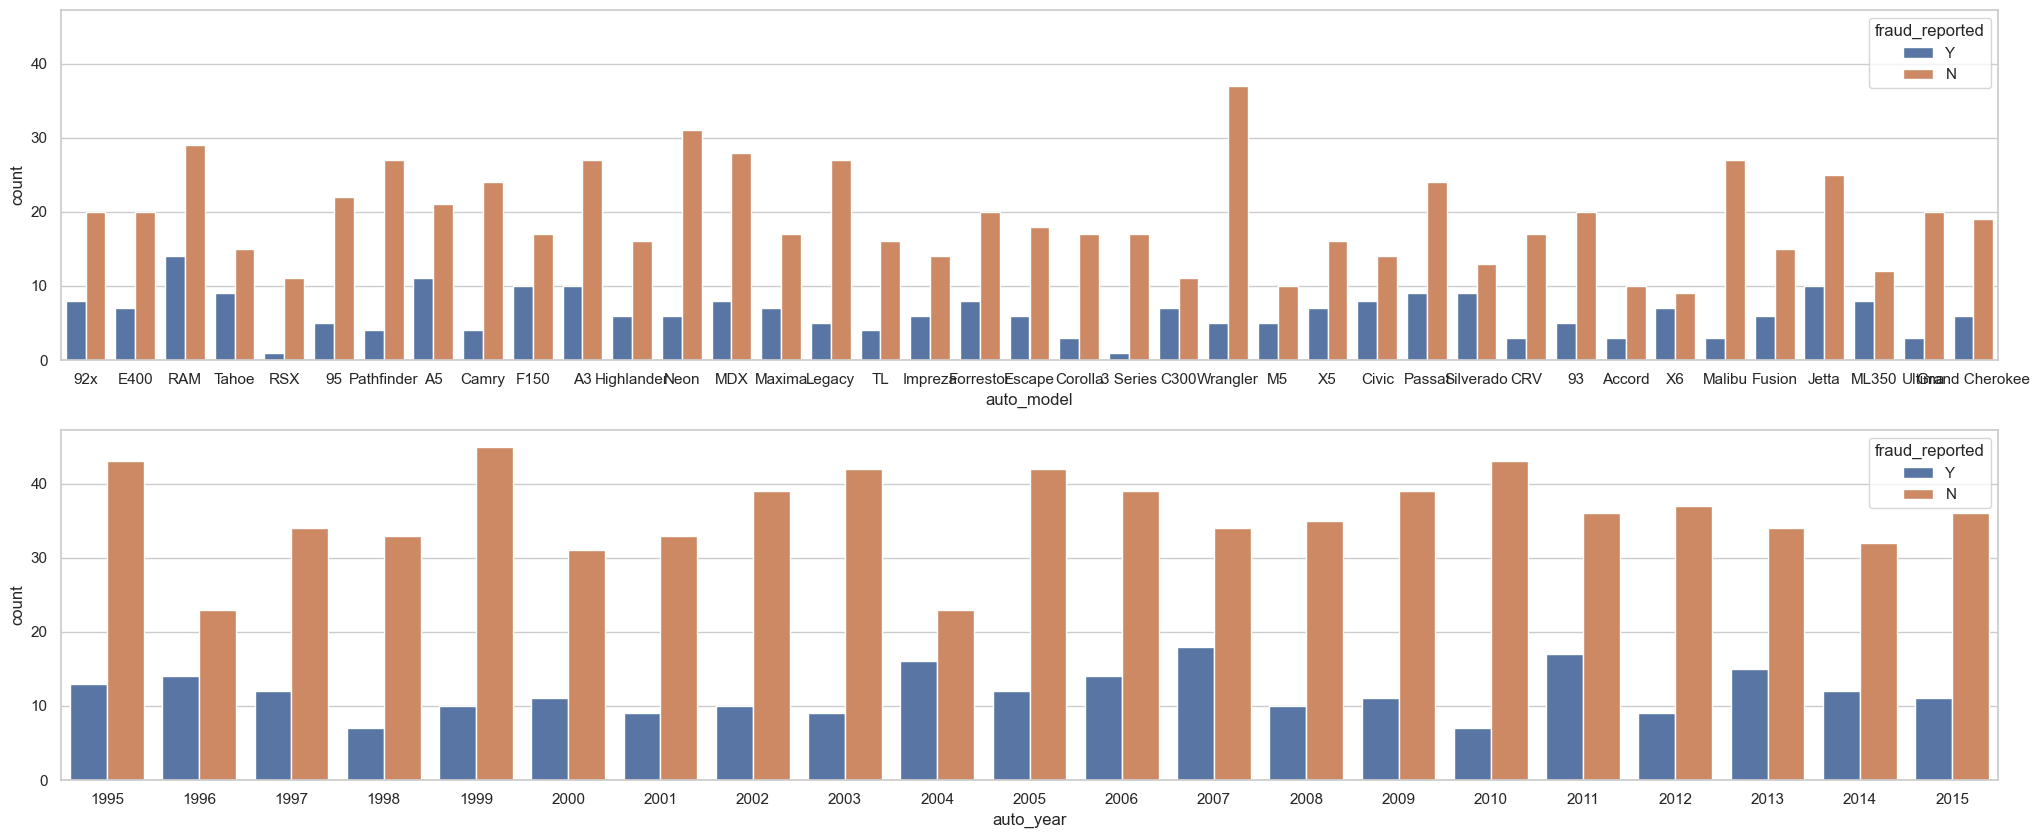

In [232]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2,1,figsize=(25,10),sharey=True)

sns.countplot(x="auto_model", data=df1, hue="fraud_reported", ax=axes[0])
sns.countplot(x="auto_year", data=df1, hue="fraud_reported", ax=axes[1])


RAM, A5 Jetta has highest fraud cases, new vehicle has more cases than older one. 

Text(0.5, 1.0, 'incident by Severity and Collision type')

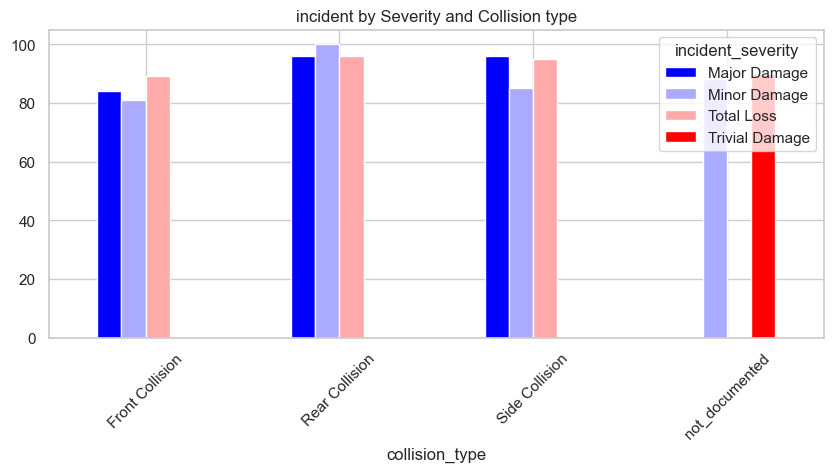

In [233]:
#incident plotting to see how severe the incident is with incident type

inc = pd.crosstab(df1['collision_type'],df1['incident_severity'])
inc.plot(kind='bar',colormap='bwr',figsize=(10,4))

plt.xticks(rotation=45)

plt.title("incident by Severity and Collision type")



Severe damage are occured on Front collision, Rear collision and side collision, the collision type was undocumented which is mostly trivial damage. 


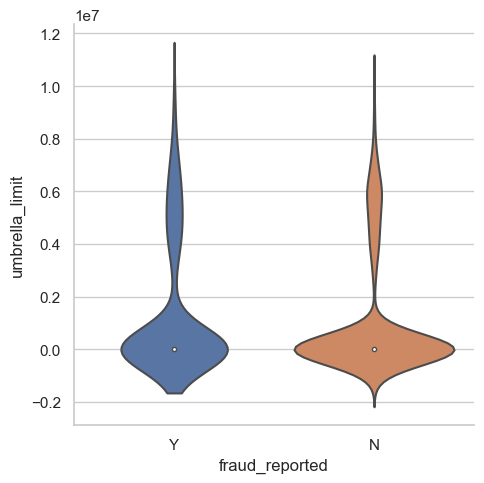

In [234]:
sns.catplot(data=df1, x ="fraud_reported", y = "umbrella_limit",kind='violin')


 ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Text(0, 0.5, 'fraud_reported')

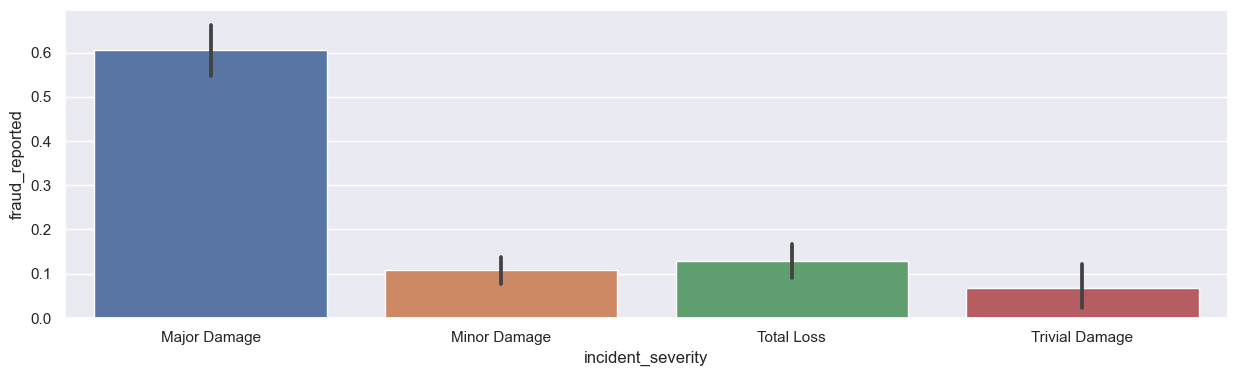

In [256]:
#Now lets compare severity aand how many fraud cases were reported

plt.figure(figsize=(15,4))
sns.barplot(df1['incident_severity'],df1['fraud_reported'],data=df1)
plt.xlabel('incident_severity')
plt.ylabel('fraud_reported')

Most of the fraud reported cases were occured with major damage

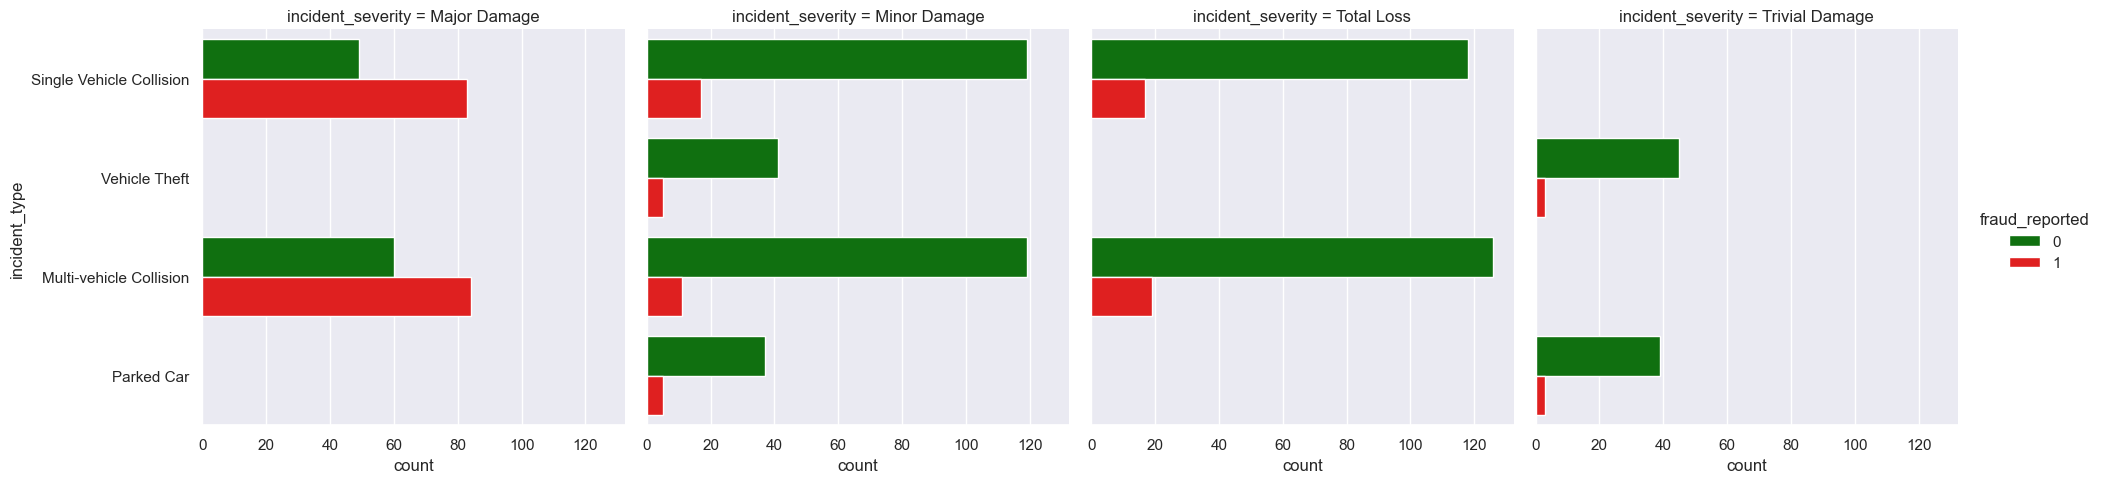

In [261]:
#Let check three variables together by plotting catplot: severity, claim and fraud

sns.catplot(y= "incident_type", col ="incident_severity", hue = "fraud_reported", data = df1, palette= ['green', 'red'],kind="count")


In this analysis, the incident severity towards Major cases has more fraud reported as compare to non-fraud for single-vehicle and multi-vehicle


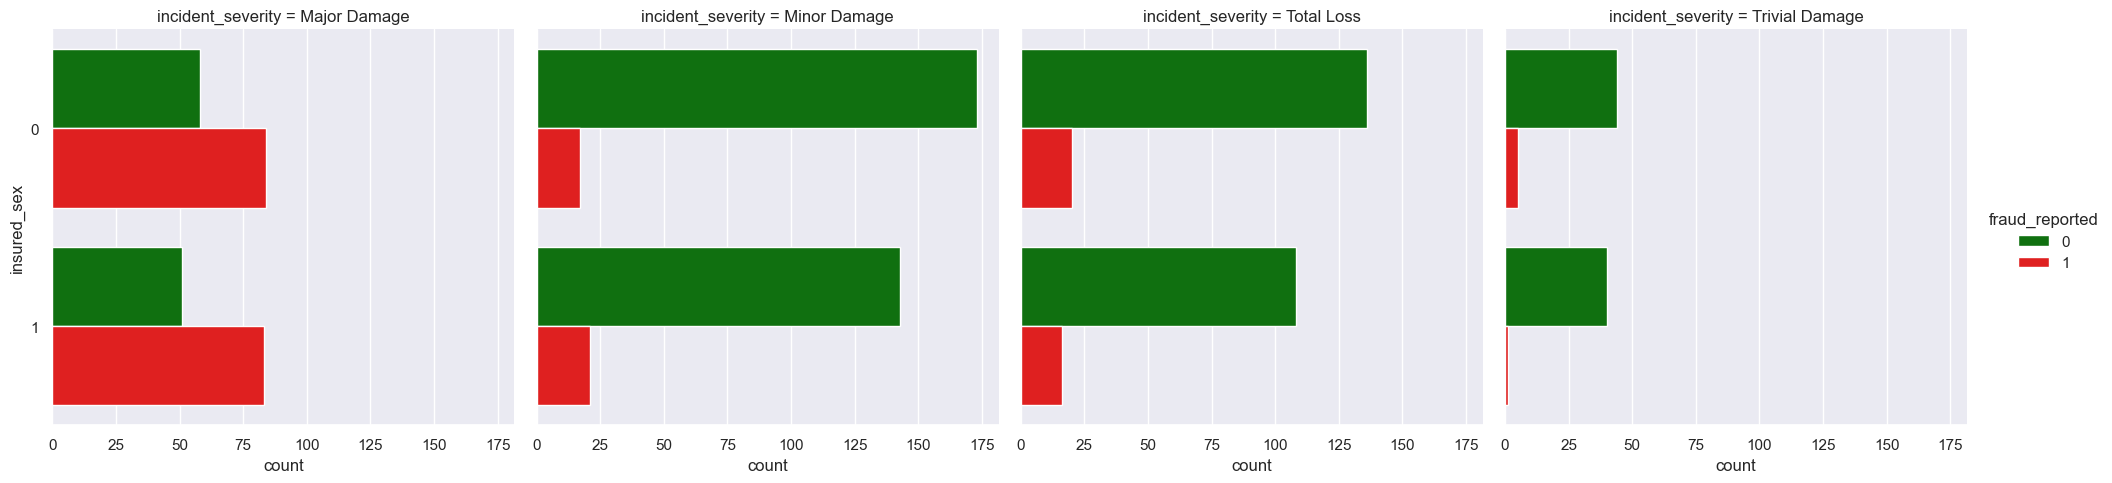

In [262]:
sns.catplot(y="insured_sex", col="incident_severity", hue="fraud_reported", data=df1, palette=['green', 'red'], kind="count")



In this graph, Females tend to have more fraudulent cases in major damage than Male.

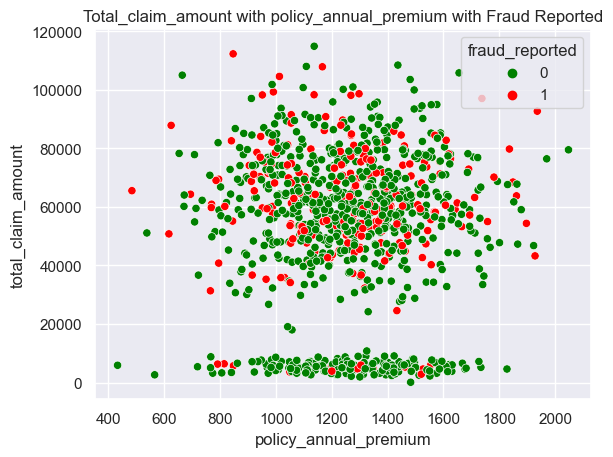

In [264]:
sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", hue="fraud_reported", data=df1, palette=['green','red'])
plt.title("Total_claim_amount with policy_annual_premium with Fraud Reported");
     

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

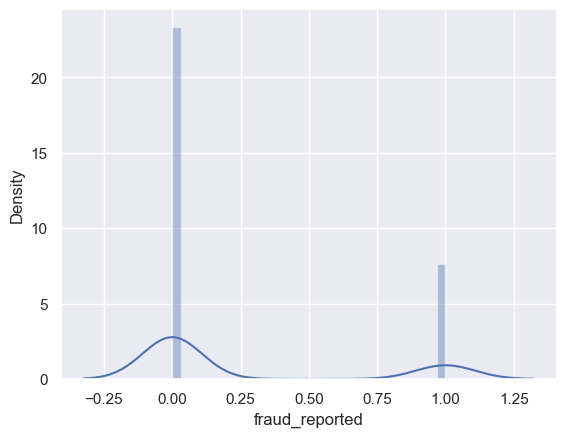

In [266]:
#Analyze the Target variable

sns.distplot(df1['fraud_reported'])

In [265]:
#changing categorical columns into encoder

categorical_col = ['insured_sex','police_report_available',
                   'fraud_reported']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

#for col in categorical_col:
df1["fraud_reported"] = label_encoder.fit_transform(df1["fraud_reported"])





In [269]:
df_claim=df1.copy
df_claim()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-06-09           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ... police_report_available total_claim_amount injury_claim  \
0              1  ...                     YES              71610         6510   
1              1  ...          not_documented               5070          780   
2              0  ...                      NO              34650         7700   
3              0  ...                      NO              63400         6340   
4              1  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995            0  ...          not_documented              87200        17440   
996            0  ...          not_documented             108480        18080   
997            0  ...                     YES              67500         7500   
998            1  ...                     YES              46980         5220   
999            0  ...          not_documented               5060          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported incident_month  
0                1              1  
1                1              1  
2                0              2  
3                1             10  
4                0              2  
..             ...            ...  
995              0              2  
996              0              1  
997              0              1  
998              

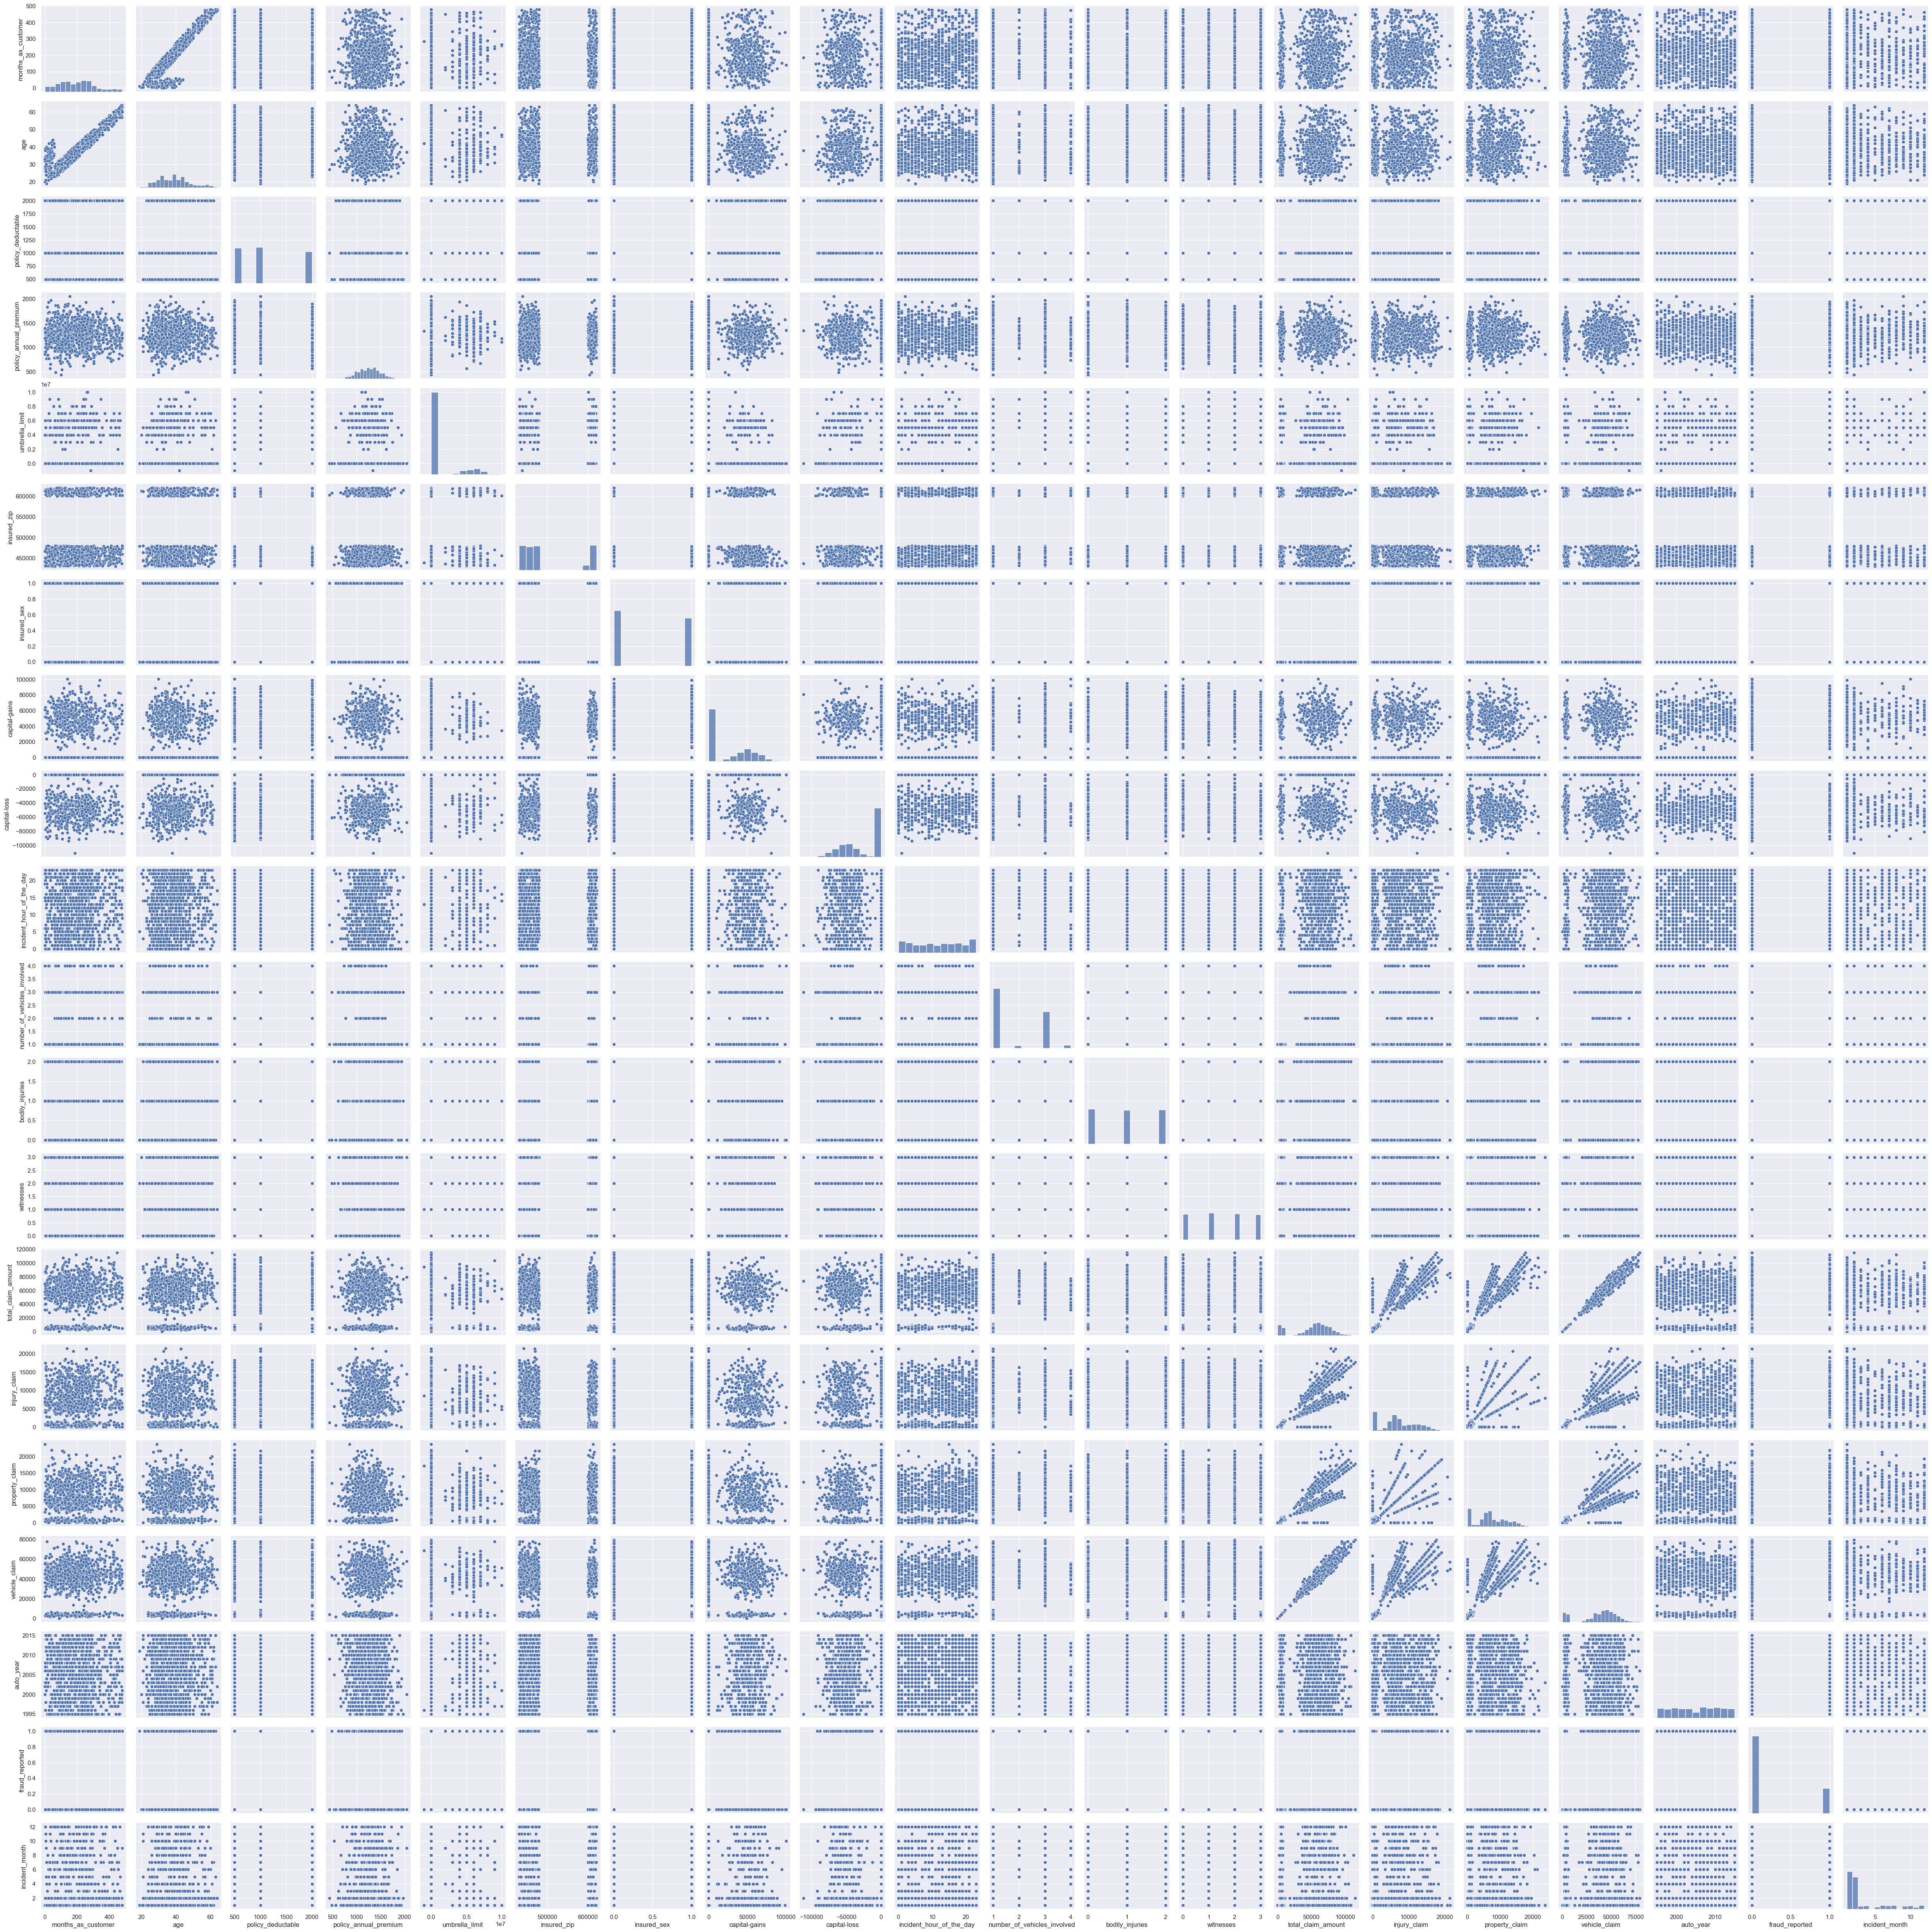

In [248]:
#Lets plot some more features against fraud report

sns.pairplot(df1)

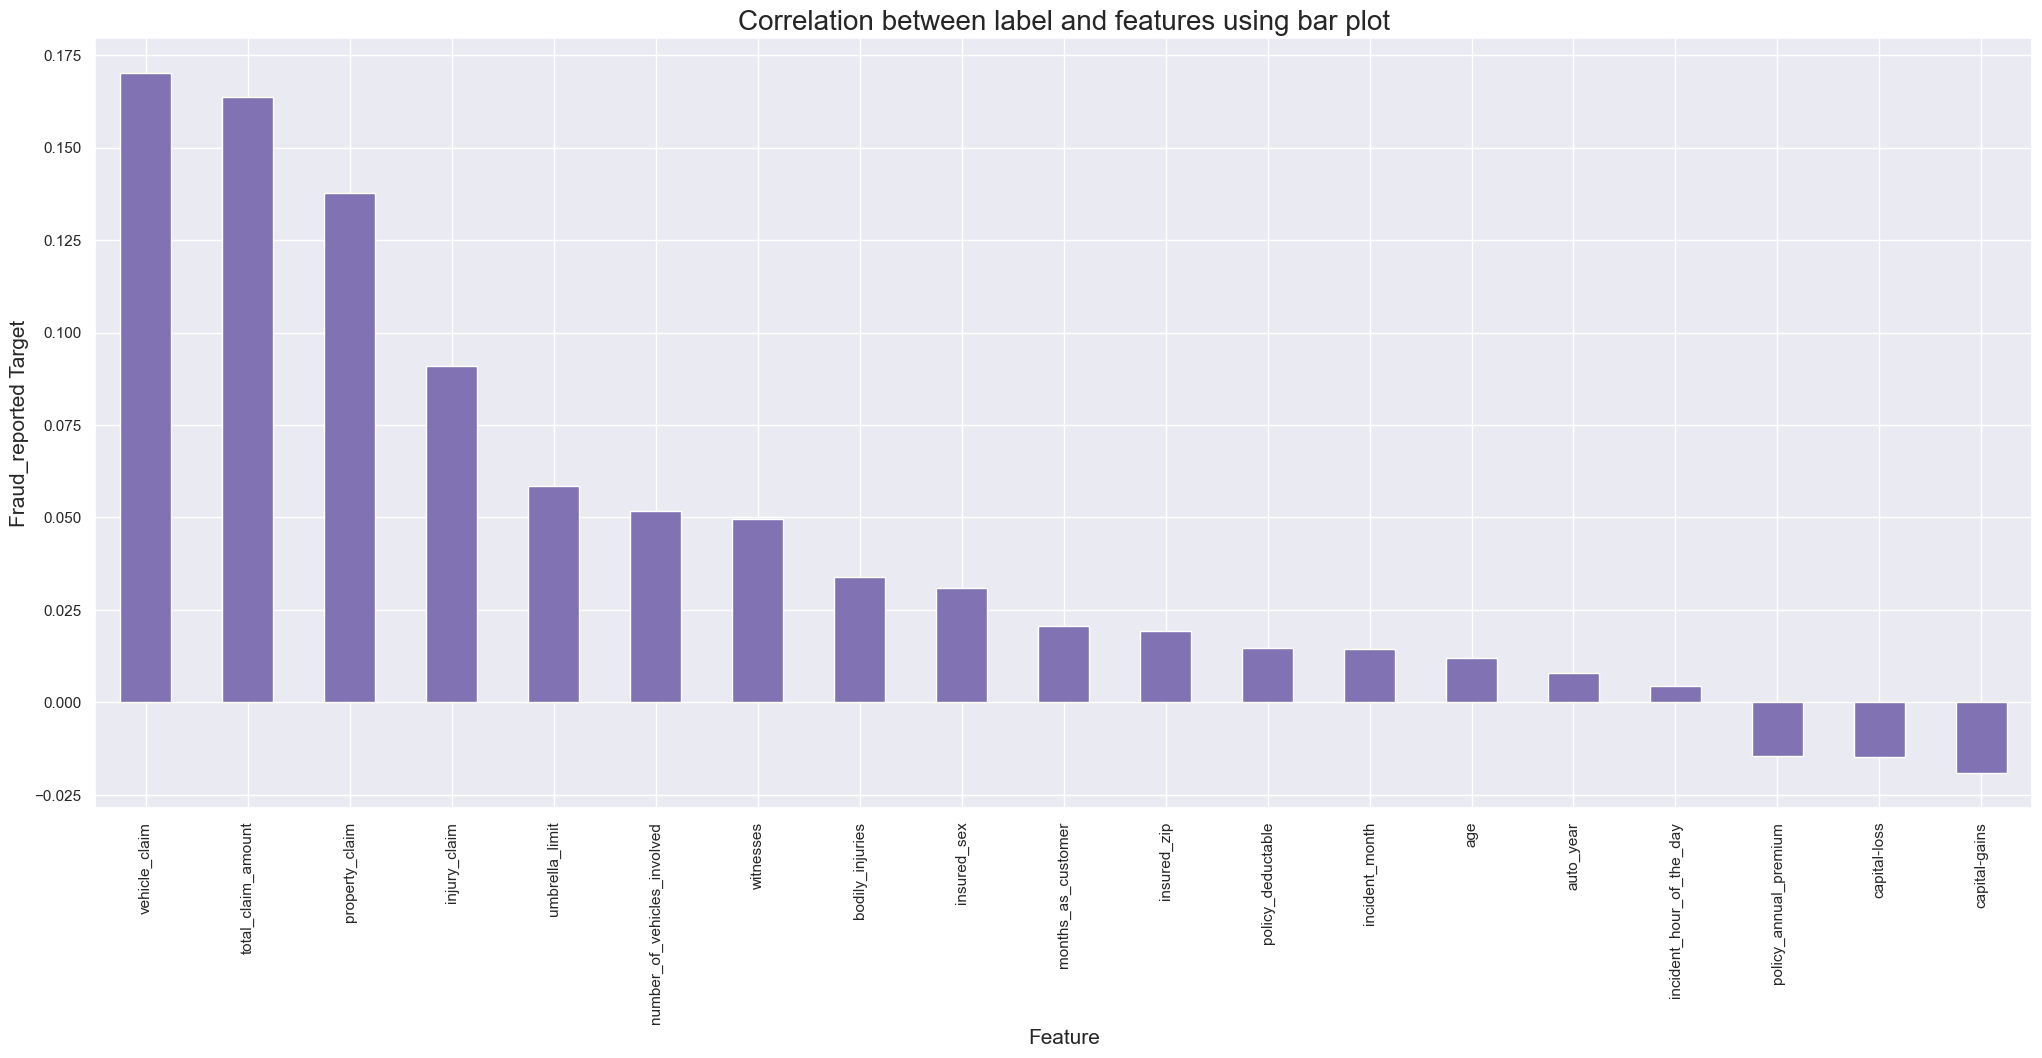

In [270]:
plt.figure(figsize = (25,10))

df1.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Fraud_reported Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()

In this correlation graph, we see some stronger relation of claims with fraud cases and very less relation with incident_hours per day to predict fraud cases. 

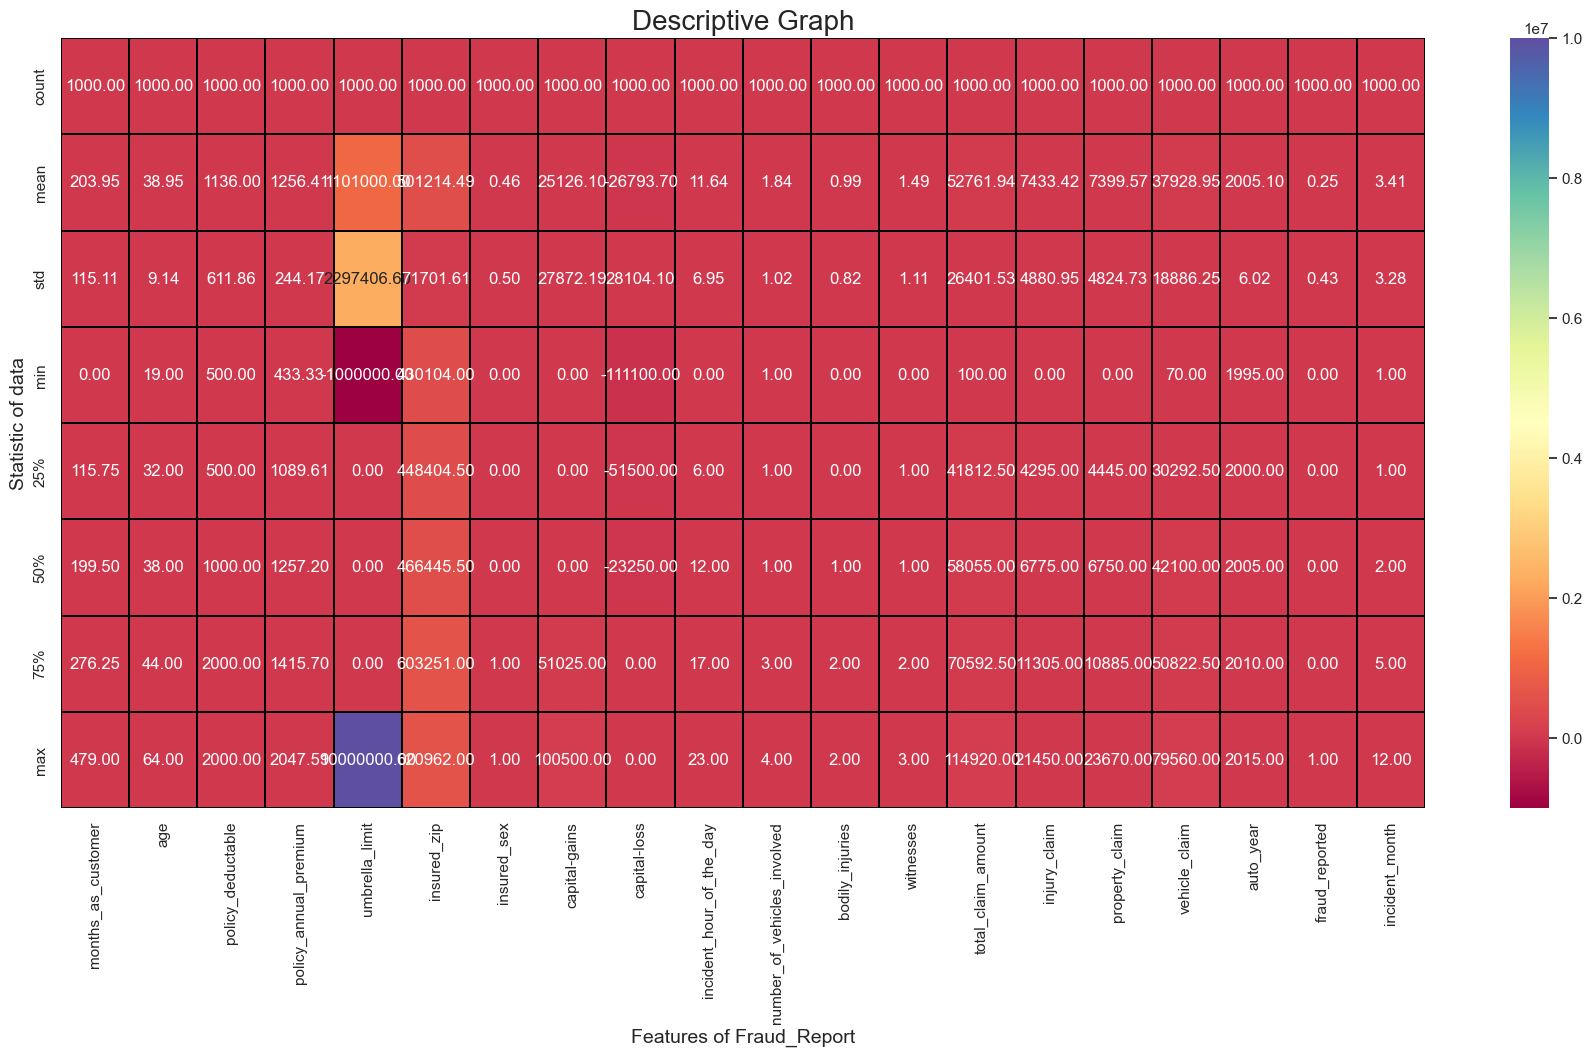

In [252]:
#Descriptive Graph of features and target variable of the team 

plt.figure(figsize=(22,10))
sns.heatmap(df1.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Features of Fraud_Report',fontsize=14)
plt.ylabel('Statistic of data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()


<AxesSubplot:>

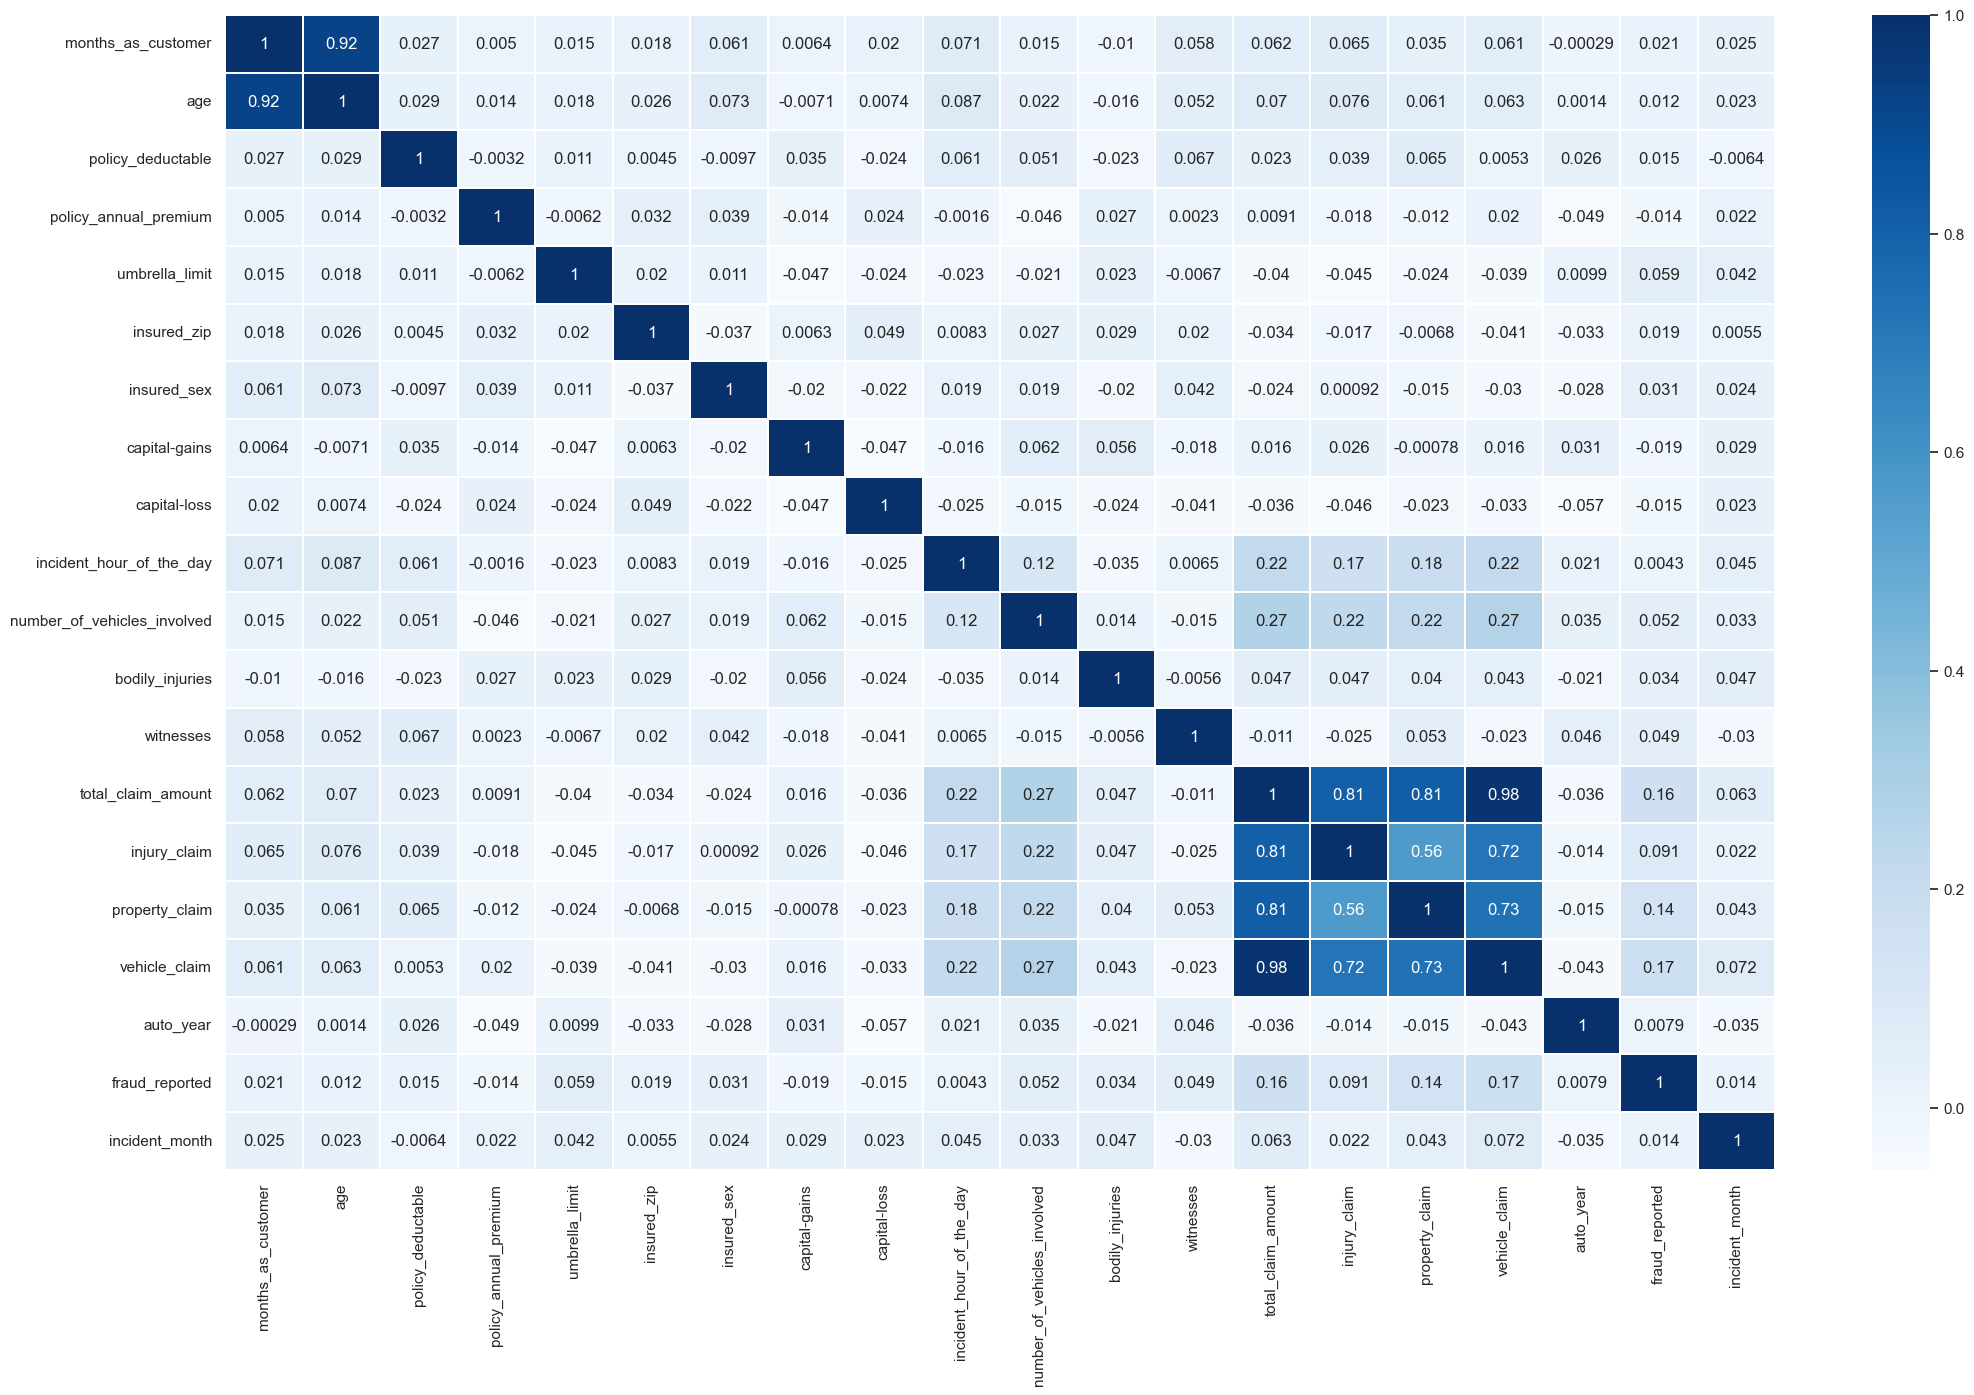

In [253]:
#Correlation map to display the most correlated variables:

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (25,15))
sns.heatmap(df1.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)



In [271]:
df_claim()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-06-09           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  ... police_report_available total_claim_amount injury_claim  \
0              1  ...                     YES              71610         6510   
1              1  ...          not_documented               5070          780   
2              0  ...                      NO              34650         7700   
3              0  ...                      NO              63400         6340   
4              1  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995            0  ...          not_documented              87200        17440   
996            0  ...          not_documented             108480        18080   
997            0  ...                     YES              67500         7500   
998            1  ...                     YES              46980         5220   
999            0  ...          not_documented               5060          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported incident_month  
0                1              1  
1                1              1  
2                0              2  
3                1             10  
4                0              2  
..             ...            ...  
995              0              2  
996              0              1  
997              0              1  
998              

In [281]:
#creating bins for umbrella_limit

quantile_bin = [0, .25, .5, .75, 1.]
quantiles = df1["umbrella_limit"].quantile(quantile_bin)
quantiles

     

0.00    -1000000.0
0.25           0.0
0.50           0.0
0.75           0.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [285]:
df1["umbrella_limit"].describe()

count    1000.000000
mean        0.201000
std         0.400949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: umbrella_limit, dtype: float64

In [283]:
#0 means no umbrella_limit and 1 means there is umbrella limit

df1["umbrella_limit"]=np.where(df1["umbrella_limit"]>0,1,0)

In [287]:
#let make further changes in the new data frame:

df_claim()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-06-09           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22               1       468176   
2                 2000                1413.14               1       430632   
3                 2000                1415.74               1       608117   
4                 1000                1583.91               1       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49               1       442797   
998               2000                1356.92               1       441714   
999               1000                 766.19               0       612260   

     insured_sex  ... police_report_available total_claim_amount injury_claim  \
0              1  ...                     YES              71610         6510   
1              1  ...          not_documented               5070          780   
2              0  ...                      NO              34650         7700   
3              0  ...                      NO              63400         6340   
4              1  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995            0  ...          not_documented              87200        17440   
996            0  ...          not_documented             108480        18080   
997            0  ...                     YES              67500         7500   
998            1  ...                     YES              46980         5220   
999            0  ...          not_documented               5060          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported incident_month  
0                1              1  
1                1              1  
2                0              2  
3                1             10  
4                0              2  
..             ...            ...  
995              0              2  
996              0              1  
997              0              1  
998              

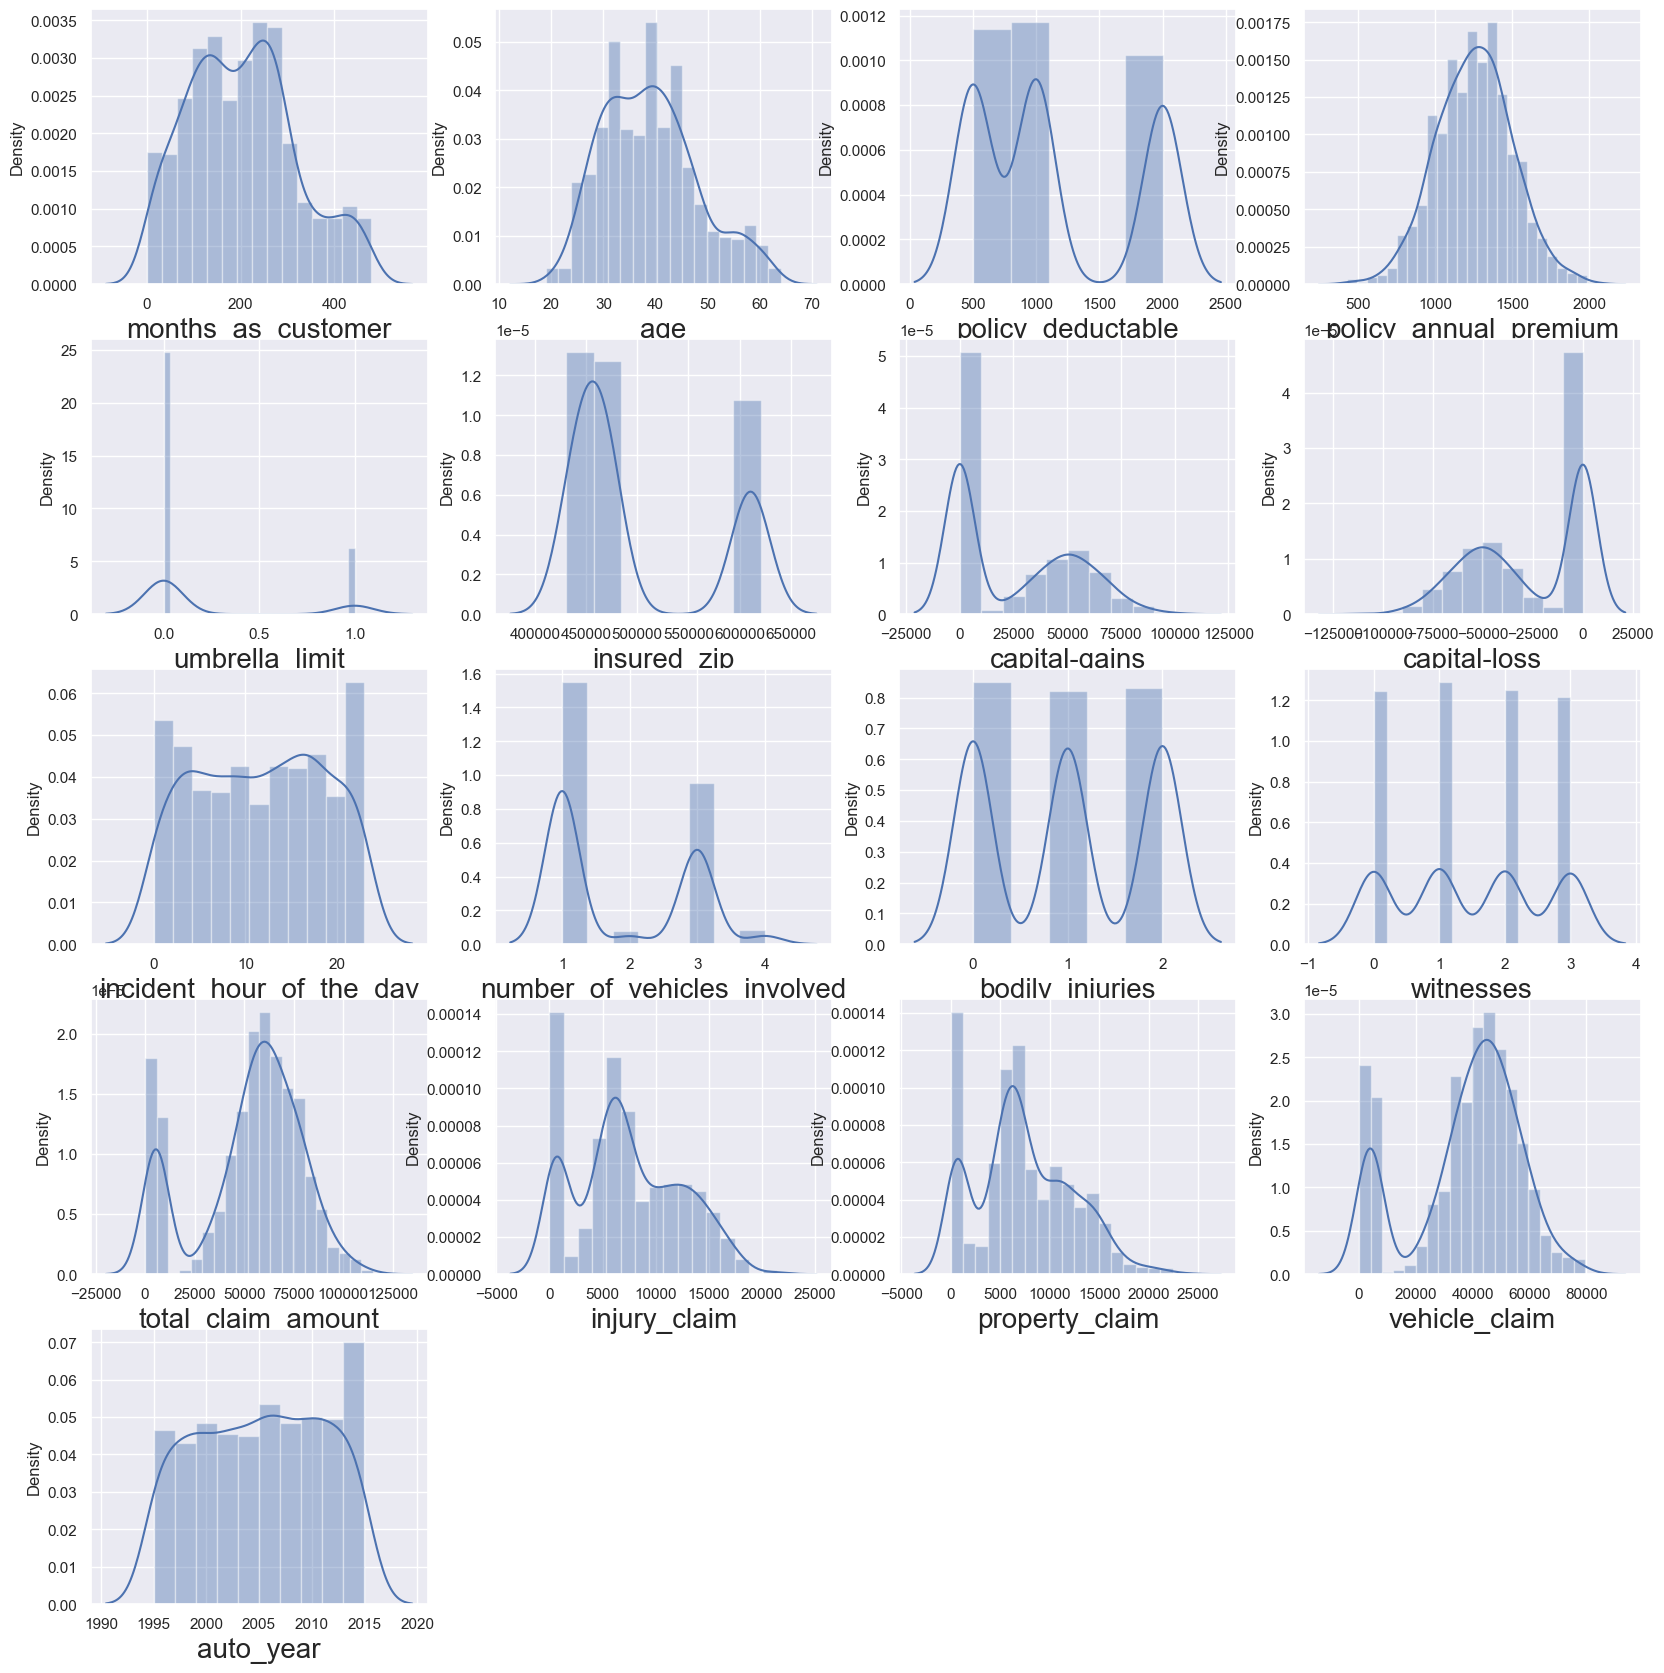

In [296]:
numerical_col=['months_as_customer', 'age', 'policy_deductable', 
               'policy_annual_premium', 'umbrella_limit', 'insured_zip', 
               'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
               'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
               'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_col:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

In [302]:
#Converting columsn of categorical data into numerical 


df1["insured_sex"] = label_encoder.fit_transform(df1["insured_sex"])
df1["police_report_available"] = label_encoder.fit_transform(df1["police_report_available"])

df1

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       2014-10-17           OH    250/500   
1                   228   42       2006-06-27           IN    250/500   
2                   134   29       2000-06-09           OH    100/300   
3                   256   41       1990-05-25           IL    250/500   
4                   228   44       2014-06-06           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       1991-07-16           OH   500/1000   
996                 285   41       2014-05-01           IL    100/300   
997                 130   34       2003-02-17           OH    250/500   
998                 458   62       2011-11-18           IL   500/1000   
999                 456   60       1996-11-11           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22               1       468176   
2                 2000                1413.14               1       430632   
3                 2000                1415.74               1       608117   
4                 1000                1583.91               1       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49               1       442797   
998               2000                1356.92               1       441714   
999               1000                 766.19               0       612260   

     insured_sex  ... police_report_available total_claim_amount injury_claim  \
0              1  ...                       1              71610         6510   
1              1  ...                       2               5070          780   
2              0  ...                       0              34650         7700   
3              0  ...                       0              63400         6340   
4              1  ...                       0               6500         1300   
..           ...  ...                     ...                ...          ...   
995            0  ...                       2              87200        17440   
996            0  ...                       2             108480        18080   
997            0  ...                       1              67500         7500   
998            1  ...                       1              46980         5220   
999            0  ...                       2               5060          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported incident_month  
0                1              1  
1                1              1  
2                0              2  
3                1             10  
4                0              2  
..             ...            ...  
995              0              2  
996              0              1  
997              0              1  
998              

In [303]:
df1.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494452
insured_zip                    0.816554
insured_sex                    0.148630
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.000000
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
incident_month                 1.375894
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness fraud_reported, incident_month, umbrella limit column skew in the left tail of the distribution. 

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

# Checking for outliers:

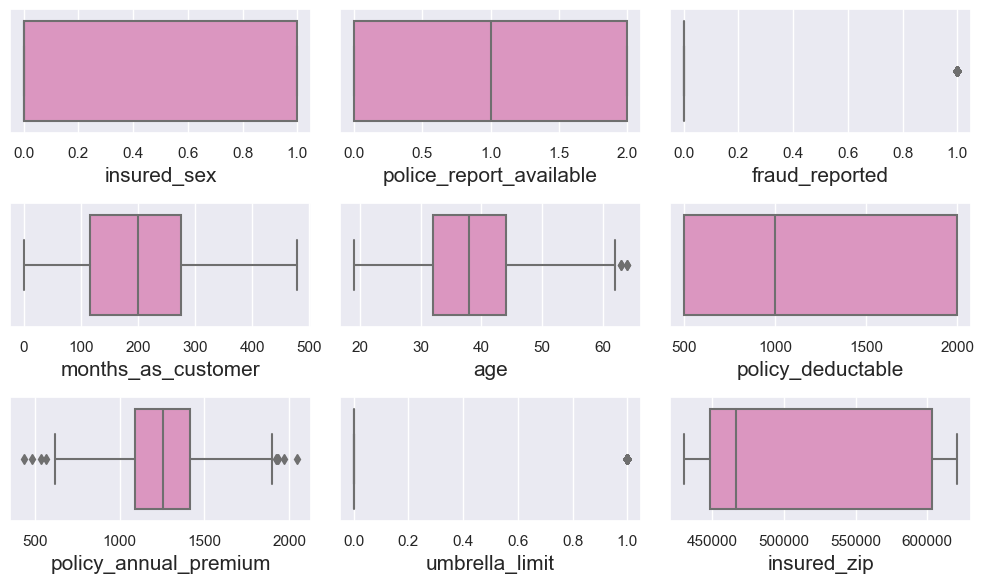

In [304]:
#lets check the outliers by plotting boxplot of categorical/numerical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in categorical_col:
    if plotnumber<=12:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

for col in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


In [305]:
#Lets drop the irrelevant columns from the data that doesn't require to predict:

df1.drop(columns=["policy_bind_date", "insured_zip", "incident_date", 
                       "incident_location", "incident_city", "total_claim_amount", "auto_model", 
                       "incident_month"],inplace=True)


Z- score method

In [306]:
# Removing the outliers using zscore and IQR techniques before building the models and selected best one. 

from scipy.stats import zscore
out_features=df1[['police_report_available','umbrella_limit','policy_annual_premium','fraud_reported']]
z=np.abs(zscore(out_features))
z


police_report_available  umbrella_limit  policy_annual_premium  \
0                   0.000000        0.501562               0.616705   
1                   1.207363        1.993771               0.242521   
2                   1.207363        1.993771               0.642233   
3                   1.207363        1.993771               0.652886   
4                   1.207363        1.993771               1.341980   
..                       ...             ...                    ...   
995                 1.207363        0.501562               0.222884   
996                 1.207363        0.501562               0.739141   
997                 0.000000        1.993771               0.520739   
998                 0.000000        1.993771               0.411866   
999                 1.207363        0.501562               2.008710   

     fraud_reported  
0          1.746019  
1          1.746019  
2          0.572731  
3          1.746019  
4          0.572731  
..              ...  
995        0.572731  
996        0.572731  
997        0.572731  
998        0.572731  
999        0.572731  

[1000 rows x 4 columns]

In [307]:
#threshold =3

np.where(z>3)

(array([229, 248, 763], dtype=int64), array([2, 2, 2], dtype=int64))

In [308]:
df2=df1[(z<3).all(axis=1)]
df2.shape


(997, 31)

In [309]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 1000
new data frame 997


In [310]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 0.3


In [313]:
# we see many skewness in the data distributed in the graphs. 
df2.skew()

months_as_customer             0.357874
age                            0.475895
policy_deductable              0.474698
policy_annual_premium          0.032245
umbrella_limit                 1.489761
insured_sex                    0.147055
capital-gains                  0.476405
capital-loss                  -0.394677
incident_hour_of_the_day      -0.040465
number_of_vehicles_involved    0.502025
bodily_injuries                0.009257
witnesses                      0.024146
police_report_available       -0.003741
injury_claim                   0.267816
property_claim                 0.379701
vehicle_claim                 -0.621270
auto_year                     -0.048283
fraud_reported                 1.176679
dtype: float64

In [314]:
#removing skewness using yeo- johnson method

Skew_data = ['fraud_reported','umbrella_limit']

from sklearn.preprocessing import PowerTransformer

sk = PowerTransformer(method='yeo-johnson')
df2[Skew_data] = sk.fit_transform(df2[Skew_data].values)
df2[Skew_data].head()


fraud_reported  umbrella_limit
0        1.747239       -0.502506
1        1.747239        1.990025
2       -0.572331        1.990025
3        1.747239        1.990025
4       -0.572331        1.990025

In [327]:
df2.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922031           0.025307   
age                                    0.922031  1.000000           0.027881   
policy_deductable                      0.025307  0.027881           1.000000   
policy_annual_premium                 -0.000400  0.007713          -0.006679   
umbrella_limit                         0.002424 -0.002231          -0.002120   
insured_sex                            0.060532  0.073843          -0.010689   
capital-gains                          0.005866 -0.007388           0.034901   
capital-loss                           0.019039  0.007140          -0.024989   
incident_hour_of_the_day               0.067995  0.084922           0.059192   
number_of_vehicles_involved            0.015045  0.022024           0.052133   
bodily_injuries                       -0.013276 -0.018781          -0.024636   
witnesses                              0.060949  0.055074           0.067903   
police_report_available               -0.073553 -0.065066           0.004404   
injury_claim                           0.066144  0.075331           0.040216   
property_claim                         0.034876  0.060128           0.065577   
vehicle_claim                          0.060313  0.060882           0.005328   
auto_year                              0.001902  0.003648           0.027844   
fraud_reported                         0.021945  0.013026           0.016419   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                       -0.000400        0.002424   
age                                       0.007713       -0.002231   
policy_deductable                        -0.006679       -0.002120   
policy_annual_premium                     1.000000       -0.002421   
umbrella_limit                           -0.002421        1.000000   
insured_sex                               0.043315        0.014332   
capital-gains                            -0.011369       -0.045133   
capital-loss                              0.028178       -0.016494   
incident_hour_of_the_day                 -0.003803       -0.018820   
number_of_vehicles_involved              -0.043247       -0.028824   
bodily_injuries                           0.023206        0.048857   
witnesses                                 0.004054       -0.009398   
police_report_available                   0.010347        0.016893   
injury_claim                             -0.024156       -0.041612   
property_claim                           -0.013577       -0.017283   
vehicle_claim                             0.011633       -0.034939   
auto_year                                -0.039794        0.007092   
fraud_reported                           -0.009196        0.060340   

                             insured_sex  capital-gains  capital-loss  \
months_as_customer              0.060532       0.005866      0.019039   
age                             0.073843      -0.007388      0.007140   
policy_deductable              -0.010689       0.034901     -0.024989   
policy_annual_premium           0.043315      -0.011369      0.028178   
umbrella_limit                  0.014332      -0.045133     -0.016494   
insured_sex                     1.000000      -0.021537     -0.025307   
capital-gains                  -0.021537       1.000000     -0.048554   
capital-loss                   -0.025307      -0.048554      1.000000   
incident_hour_of_the_day        0.017492      -0.017889     -0.028253   
number_of_vehicles_involved     0.020029       0.061194     -0.013983   
bodily_injuries                -0.021321       0.054736     -0.026620   
witnesses                       0.042839      -0.016430     -0.040246   
police_report_available        -0.028963       0.001129     -0.013418   
injury_claim                    0.004513       0.027477     -0.041809   
property_claim                 -0.012546      -0.000638     -0.020510   
vehicle_c

In [342]:
categorical_col = []
for i in df2.dtypes.index:
    if df1.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)


categorical Columns: ['policy_state', 'policy_csl', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'property_damage', 'auto_make']


In [344]:
#Changing remaining categorical column into numerical column 

categorical_cols =['policy_state', 'policy_csl', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 
                      'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 
                      'authorities_contacted', 'incident_state', 'property_damage', 'auto_make']

label_encoder=LabelEncoder()    
    
for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

print(df2)

     months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0               

In [345]:
df2.describe()

months_as_customer         age  policy_state  policy_csl  \
count          997.000000  997.000000    997.000000  997.000000   
mean           204.245737   38.970913      1.016048    0.949850   
std            115.146061    9.141577      0.830966    0.805037   
min              0.000000   19.000000      0.000000    0.000000   
25%            116.000000   32.000000      0.000000    0.000000   
50%            200.000000   38.000000      1.000000    1.000000   
75%            277.000000   44.000000      2.000000    2.000000   
max            479.000000   64.000000      2.000000    2.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
count         997.000000             997.000000    9.970000e+02   997.000000   
mean         1136.910732            1257.212197    1.506652e-16     0.463390   
std           612.423002             240.603426    1.000502e+00     0.498908   
min           500.000000             538.170000   -5.025063e-01     0.000000   
25%           500.000000            1090.320000   -5.025063e-01     0.000000   
50%          1000.000000            1257.360000   -5.025063e-01     0.000000   
75%          2000.000000            1415.680000   -5.025063e-01     1.000000   
max          2000.000000            1969.630000    1.990025e+00     1.000000   

       insured_education_level  insured_occupation  ...  property_damage  \
count               997.000000          997.000000  ...       997.000000   
mean                  2.964895            6.662989  ...         1.019057   
std                   1.949094            4.018627  ...         0.835121   
min                   0.000000            0.000000  ...         0.000000   
25%                   1.000000            3.000000  ...         0.000000   
50%                   3.000000            7.000000  ...         1.000000   
75%                   5.000000           10.000000  ...         2.000000   
max                   6.000000           13.000000  ...         2.000000   

       bodily_injuries   witnesses  police_report_available  injury_claim  \
count       997.000000  997.000000               997.000000    997.000000   
mean          0.994985    1.483450                 1.002006   7428.144433   
std           0.819550    1.110816                 0.828700   4877.128005   
min           0.000000    0.000000                 0.000000      0.000000   
25%           0.000000    1.000000                 0.000000   4300.000000   
50%           1.000000    1.000000                 1.000000   6770.000000   
75%           2.000000    2.000000                 2.000000  11280.000000   
max           2.000000    3.000000                 2.000000  21450.000000   

       property_claim  vehicle_claim   auto_make    auto_year  fraud_reported  
count      997.000000     997.000000  997.000000   997.000000    9.970000e+02  
mean      7402.036108   37939.077232    6.544634  2005.094283   -4.966494e-17  
std       4825.037754   18873.404200    4.030165     6.013300    1.000502e+00  
min          0.000000      70.000000    0.000000  1995.000000   -5.723314e-01  
25%       4450.000000   30310.000000    3.000000  2000.000000   -5.723314e-01  
50%       6750.000000   42120.000000    7.000000  2005.000000   -5.723314e-01  
75%      10880.000000   50800.000000   10.000000  2010.000000   -5.723314e-01  
max      23670.000000   79560.000000   13.000000  2015.000000    1.747239e+00  

[8 rows x 31 columns]

In [346]:
cor['fraud_reported'].sort_values

<bound method Series.sort_values of months_as_customer             0.020544
age                            0.012143
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_zip                    0.019368
insured_sex                    0.030873
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
bodily_injuries                0.033877
witnesses                      0.049497
total_claim_amount             0.163651
injury_claim                   0.090975
property_claim                 0.137835
vehicle_claim                  0.170049
auto_year                      0.007928
fraud_reported                 1.000000
incident_month                 0.014495
Name: fraud_reported, dtype: float64>

# Seperating features and label

In [347]:
#Seperating the independent and target variables into x and y

x = df2.drop("fraud_reported",axis=1)
y = df2['fraud_reported'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (997, 30)
Label Dimension (997,)


# Feature Scaling using Standard Scalarization


In [348]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

months_as_customer       age  policy_state  policy_csl  \
0              1.075298  0.988190      1.184700    0.062327   
1              0.206400  0.331519     -0.019322    0.062327   
2             -0.610364 -1.091269      1.184700   -1.180475   
3              0.449692  0.222074     -1.223344    0.062327   
4              0.206400  0.550410     -1.223344    1.305129   
..                  ...       ...           ...         ...   
992           -1.748620 -0.106262      1.184700    1.305129   
993            0.701672  0.222074     -1.223344   -1.180475   
994           -0.645120 -0.544043      1.184700    0.062327   
995            2.204866  2.520423     -1.223344    1.305129   
996            2.187488  2.301533      1.184700    0.062327   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_sex  \
0            -0.223668               0.622489       -0.502506     1.076108   
1             1.410010              -0.249466        1.990025     1.076108   
2             1.410010               0.648395        1.990025    -0.929275   
3             1.410010               0.659207        1.990025    -0.929275   
4            -0.223668               1.358508        1.990025     1.076108   
..                 ...                    ...             ...          ...   
992          -0.223668               0.222834       -0.502506    -0.929275   
993          -0.223668               0.746739       -0.502506    -0.929275   
994          -1.040507               0.525101        1.990025    -0.929275   
995           1.410010               0.414615        1.990025     1.076108   
996          -0.223668              -2.041819       -0.502506    -0.929275   

     insured_education_level  insured_occupation  ...  \
0                   0.531337           -1.160926  ...   
1                   0.531337           -0.165062  ...   
2                   1.557969            1.079769  ...   
3                   1.557969           -1.409892  ...   
4                  -1.521929            1.079769  ...   
..                       ...                 ...  ...   
992                 1.044653           -1.160926  ...   
993                 1.557969            0.581837  ...   
994                 1.044653           -1.409892  ...   
995                -1.521929           -0.414028  ...   
996                -1.521929            1.079769  ...   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                      -0.824233        -0.022831         0.006122   0.465252   
1                      -0.824233         1.175201        -1.214672  -1.336130   
2                       1.139351        -1.220863         1.226917   1.365942   
3                      -0.824233         1.175201         0.006122   0.465252   
4                      -0.824233        -1.220863        -1.214672  -0.435439   
..                           ...              ...              ...        ...   
992                    -0.824233        -0.022831        -1.214672  -0.435439   
993                    -0.824233        -0.022831         1.226917   1.365942   
994                     1.139351         1.175201         1.226917   1.365942   
995                    -0.824233         1.175201        -1.214672  -0.435439   
996                    -0.824233         1.175201        -1.214672   1.365942   

     police_report_available  injury_claim  property_claim  vehicle_claim  \
0                  -0.002422     -0.188350        1.164920       0.749627   
1                   1.204894     -1.363811       -1.373121      -1.825127   
2                  -1.209737      0.055769       -0.736537      -0.786637   
3                  -1.209737     -0.223224       -0.220220       0.677532   
4                  -1.209737     -1.257137       -1.400077      -1.769995   
..                       ...           ...             ...            ...   
992                 1.204894      2.053848        0.273288       1.224608   
993                 1.204894      2.1

# VIF to find multicolinearity


In [350]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif


VIF values                     Features
0     6.831233           months_as_customer
1     6.825873                          age
2     1.028100                 policy_state
3     1.025702                   policy_csl
4     1.029716            policy_deductable
5     1.025104        policy_annual_premium
6     1.024913               umbrella_limit
7     1.025018                  insured_sex
8     1.032615      insured_education_level
9     1.015597           insured_occupation
10    1.046461              insured_hobbies
11    1.043434         insured_relationship
12    1.033592                capital-gains
13    1.033612                 capital-loss
14    5.099558                incident_type
15    1.708343               collision_type
16    1.200262            incident_severity
17    1.095200        authorities_contacted
18    1.040417               incident_state
19    1.084804     incident_hour_of_the_day
20    5.082336  number_of_vehicles_involved
21    1.019155              property_damage
22    1.020221              bodily_injuries
23    1.037907                    witnesses
24    1.028038      police_report_available
25    2.178431                 injury_claim
26    2.244788               property_claim
27    3.836162                vehicle_claim
28    1.036435                    auto_make
29    1.031951                    auto_year

After checking the Variance values, none of the value is more than 10 so we can move on to the next step. 

In [351]:
#Oversampling


from imblearn.over_sampling import SMOTE

SM = SMOTE()
x,y = SM.fit_resample(x,y)


In [352]:
y.value_counts()

1    751
0    751
Name: fraud_reported, dtype: int64

## Creating train test split
 

In [418]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score


In [415]:
#Finding the best random state using Logistic Regression

maxAcc = 0
maxRS = 0

for i in range(200, 800):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max accuracy score is", maxAcc, "at random_state", maxRS)


Max accuracy score is 0.8205980066445183 at random_state 357


# Modeling


In [422]:
#Model building using different type of regressor by looping them all to get the accuracy of each regressor:

model=[RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x_train,y_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x_test)
    
    print('Accuracy_Score:',accuracy_score(y_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y,cv=5).mean())

    #print ("f1score", f1score = f1_score(y_test, y_pred))

    
    print ("The difference between accuracy score and CV is", (accuracy_score(y_test,pred)-(cross_val_score(m,x,y,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestClassifier()
Accuracy_Score: 0.8803986710963455
MAE: 0.11960132890365449
MSE: 0.11960132890365449
RMSE: 0.345834250622541
Cross_Validaton_Score 0.8749523809523809
The difference between accuracy score and CV is 0.0014573643410852322
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : ExtraTreesClassifier()
Accuracy_Score: 0.9069767441860465
MAE: 0.09302325581395349
MSE: 0.09302325581395349
RMSE: 0.30499714066520933
Cross_Validaton_Score 0.9095260243632335
The difference between accuracy score and CV is 0.0007796234772977639
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : GradientBoostingClassifier()
Accuracy_Score: 0.8903654485049833
MAE: 0.10963455149501661
MSE: 0.109

After checking all the accuracy value of each classifier, we find ExtraTrees Classifier the best model to predict our model of insurance fraud report. 

# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [423]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create an ExtraTreeClassifier instance
ET = ExtraTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [40]
}

# Create a GridSearchCV object with the parameter grid and cross-validation folds (cv)
grid = GridSearchCV(ET, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid.fit(x_train, y_train)  # Replace X and y with your training data and target labels

print(grid.best_params_)




{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 40}


In [424]:
#Create a final model using linear fit

Final_model = ExtraTreeClassifier()

Final_model.fit(x_train,y_train)

#predict the target variable using the test data
y2_prediction= Final_model.predict(x_test)
y2_prediction

acc = accuracy_score(y_test,pred)

print("Our model learn for Fraud reported cases:",acc*100)

Our model learn for Fraud reported cases: 86.71096345514951


# saving the model


In [425]:
import joblib
joblib.dump(Final_model,"Automobile_insurance.pkl")

['Automobile_insurance.pkl']

# Predicting the saved model


In [412]:
#Lets load the saved model and get the prediction

model = joblib.load("Automobile_insurance.pkl")

#Prediction

y_prediction = model.predict(x_test)
y_prediction


array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]

In [413]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_prediction
df["Original"]=a
df

Predicted  Original
0            0         1
1            0         0
2            1         0
3            1         0
4            0         0
..         ...       ...
296          1         0
297          1         0
298          1         1
299          0         0
300          0         0

[301 rows x 2 columns]

# Final Analysis


In the analysis of Automobile insurance model, this project has built a model that can detect auto insurance fraud. The model can reduces loses for insurance companies by using fraud detection in machine learning.

Many different classifiers were used in this project. Different ways of handling imbalance classes were tested out with these classifiers: model with class weighting and hyperparameter tuning and oversampling with SMOTE was used. 

Out of various classification algorithms, ExtraTreesClassifier display the most balanced performance with:

Accuracy score of : ExtraTreesClassifier()
Accuracy_Score: 0.8970099667774086
MAE: 0.10299003322259136
MSE: 0.10299003322259136
RMSE: 0.320920602677035
Cross_Validaton_Score 0.9128438538205981
